# Table of Contents

- [Introduction](#Introduction)
- [Methodology](#Methodology)
- [Exploratory Data Analysis (I)](#Exploratory-Data-Analysis-(I))
- [Process Discovery (I)](#Process-Discovery-(I))
- [Dataset based on Top 5 and Top 10 Variants (M)](#Dataset-based-on-Top-5-and-Top-10-Variants-(M))
- [Specific Questions (M)](#Specific-Questions-(M))
- [Conclusion](#Conclusion)


# Introduction

This report aims to provide an analysis and feedback on the Travel Declaration process for international and domestic travels at a Dutch university. The analysis is conducted using two log files, namely InternationalDeclarations.xes and DomesticDeclarations.xes, which contain the declarations made for these travels. The main tools utilized for this analysis are the pandas and pm4py python packages.

The report begins with an exploratory data analysis to gain insights into the provided log files. This analysis helps identify patterns, trends, and any irregularities in the travel declaration process. Following the exploratory data analysis, a visualization of the general underlying process flow is created. This visualization offers a high-level overview of the sequence of steps involved in the travel declaration process.

Additionally, the report delves into the analysis of process duration for each step and identifies potential bottlenecks that may be causing delays or inefficiencies. By examining the duration of each step, the report aims to pinpoint areas where improvements can be made to streamline the travel declaration process.

Furthermore, a process map is created to provide a visual representation of the travel declaration process. This map highlights the relationships between different steps and allows for a better understanding of the overall process flow.

Lastly, the report analyzes the rejected applications within the travel declaration process. By examining these rejected applications, potential reasons for rejection can be identified, and recommendations for improving the process can be proposed.

Overall, this report provides a comprehensive analysis of the Travel Declaration process, utilizing data mining techniques and visualization tools. The insights and feedback provided aim to enhance the efficiency and effectiveness of the process, ultimately improving the experience for travelers and the administrative staff involved.

Chapters done by Marinus are Marked with (M) and by Ivan with (I). If there are no marks, the chapter was done by both of us.

# Methodology

To conduct the analysis of the Travel Declaration process, the following methodology was adopted. The main tools utilized for this analysis were the pandas and pm4py python packages, known for their capabilities in data manipulation and process mining.

1. Exploratory Data Analysis: Prior to diving into the process mining techniques, an exploratory data analysis was conducted. This analysis allowed for a better understanding of the data, revealing patterns, trends, and potential anomalies. Descriptive statistics, data visualizations, and data cleaning techniques were applied to gain insights into the characteristics of the travel declaration process.

2. Process Flow Visualization: After the exploratory data analysis, the next step was to visualize the general underlying process flow of the travel declaration process. This visualization aimed to provide a high-level overview of the sequence of steps involved in the process. Process mining techniques were applied to extract and represent the process flow in a clear and concise manner.

3. Duration Analysis: To identify potential bottlenecks and areas of improvement, the duration of each step in the travel declaration process was analyzed. By examining the time taken for each step, it became possible to identify steps that were causing delays or inefficiencies. This analysis was instrumental in pinpointing areas where process optimization measures could be implemented.

4. Process Map Creation: In order to provide a visual representation of the travel declaration process, a process map was created. This map showcased the relationships between different steps and provided a comprehensive view of the overall process flow. The process map aided in identifying dependencies, decision points, and potential areas for process enhancement.

5. Analysis of Rejected Applications: Lastly, the analysis delved into the examination of rejected applications within the travel declaration process. By studying these rejected applications, potential reasons for rejection were identified. This analysis facilitated the identification of process bottlenecks and inefficiencies that contributed to the rejection of applications. Recommendations for improvements were formulated based on these findings.

Throughout the entire methodology, the pandas and pm4py python packages played a crucial role in data manipulation, process mining, and visualization. These tools provided the necessary functionalities for a comprehensive analysis of the Travel Declaration process, ultimately leading to valuable insights and recommendations for process enhancement.

# Exploratory Data Analysis (I)

The process of analyzing log files and extracting valuable insights is a critical aspect of process mining. In this chapter, 
we delve into the realm of Exploratory Data Analysis (EDA) to gain a comprehensive understanding of the dataset containing permits and declarations made for international/domestic travels at a Dutch university. 
EDA serves as the foundation for uncovering patterns, identifying anomalies, and providing valuable feedback on the underlying process.

The objective of this chapter is to explore the dataset through various statistical and visual techniques, enabling us to unravel hidden trends and relationships within the data.
By conducting a thorough EDA, we aim to gain insights that will inform our analysis and contribute to optimizing the travel declaration process.

Throughout this chapter, we will guide you through the steps involved in EDA, starting with importing and preparing the dataset for analysis. 
We will then proceed to calculate descriptive statistics, visualize the data, and explore relationships between variables. 
By identifying patterns and anomalies, we will shed light on potential areas of improvement within the process.

The findings of this EDA will serve as a valuable foundation for subsequent analysis and further investigations. By understanding the dataset and uncovering its nuances, we can provide feedback on the process, 
recommend improvements, and make informed decisions based on the knowledge obtained.

In [1]:
import pm4py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
# to improve readability we will surpress warnings out of final report
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
domestic_logs_path = 'data/DomesticDeclarations.xes'
international_logs_path = 'data/InternationalDeclarations.xes'

log_d = pm4py.read_xes(domestic_logs_path)
log_i = pm4py.read_xes(international_logs_path)

parsing log, completed traces ::   0%|          | 0/10500 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/6449 [00:00<?, ?it/s]

Domestic declaration dataset contains of 10,500 traces whereas international of 6,449.

In [3]:
print(f'Domestic declarations dataset: {len(log_d):,} rows')
print('-'*80)
for column in log_d.columns:
    print(f'Column: {column} '
          f'\n Unique values: {len(log_d[column].unique()):<15,}'
          f'\n Missing Values: {log_d[column].isnull().sum()}'
          f'\n First 2 values: {list(log_d[column].unique())[:2]}')
    print('-'*80)


Domestic declarations dataset: 56,437 rows
--------------------------------------------------------------------------------
Column: id 
 Unique values: 56,437         
 Missing Values: 0
 First 2 values: ['st_step 86794_0', 'st_step 86793_0']
--------------------------------------------------------------------------------
Column: org:resource 
 Unique values: 2              
 Missing Values: 0
 First 2 values: ['STAFF MEMBER', 'SYSTEM']
--------------------------------------------------------------------------------
Column: concept:name 
 Unique values: 17             
 Missing Values: 0
 First 2 values: ['Declaration SUBMITTED by EMPLOYEE', 'Declaration FINAL_APPROVED by SUPERVISOR']
--------------------------------------------------------------------------------
Column: time:timestamp 
 Unique values: 45,403         
 Missing Values: 0
 First 2 values: [Timestamp('2017-01-09 08:49:50+0000', tz='UTC'), Timestamp('2017-01-09 10:27:48+0000', tz='UTC')]
----------------------------------

The domestic declaration dataset comprises 56,437 logs. Notably, log IDs are duplicated in both the "case:id" and "case:concept:name" columns.

Within this dataset, two distinct resources are involved: "STAFF MEMBER" and "SYSTEM". 
Additionally, there are seven different roles assigned to individuals participating in the declaration process. 
The dataset captures 17 distinct activities, reflecting the various stages and actions taken during the declaration workflow.

All cases within the domestic declaration dataset are assigned to a single budget, identified by the number 86,566. 

In [4]:
print(f'International declarations dataset: {len(log_i):,} rows')
print(f'{"Column":<35} {"Unique values":<15} {"Missing Values":<15}')
print('-'*80)
for column in log_i.columns:
    print(f'{column:<35} {len(log_i[column].unique()):<15,} {log_i[column].isnull().sum():<15}')

International declarations dataset: 72,151 rows
Column                              Unique values   Missing Values 
--------------------------------------------------------------------------------
id                                  69,073          0              
org:resource                        2               0              
concept:name                        34              0              
time:timestamp                      51,270          0              
org:role                            8               0              
case:Permit travel permit number    5,596           0              
case:DeclarationNumber              6,190           0              
case:Amount                         6,100           0              
case:RequestedAmount                6,100           0              
case:Permit TaskNumber              6               0              
case:Permit BudgetNumber            207             0              
case:OriginalAmount                 6,100           0  

The international declaration dataset presents a higher level of complexity compared to the domestic counterpart. 
It consists of 6,449 traces and contains 72,151 log entries. However, there are only 69,073 unique IDs, indicating potential duplication of IDs within the log entries.

Similar to the domestic logs, the international dataset involves two resources, and the "case:id" column is interchangeable with the "case:concept:name" column. 
However, it encompasses eight roles (one more than the domestic dataset). 
Additionally, the international dataset comprises 34 different activities, twice as many as the domestic logs. 
This higher number of activities reflects the introduction of two concepts: declarations and travel permits. 
It also demonstrates a more detailed approach to budget selection, with 719 different budgets available. 

We will proceed by analyzing duplicates in international dataset:

In [5]:
# Duplicate scattering
duplicates = log_i[log_i.groupby('id')['case:concept:name'].transform('nunique').gt(1)].sort_values(by=['id'])
print(f'Number of duplicated IDs: {len(duplicates):,}')
print('-'*80)
print(f'{"Column":<35} {"Unique values":<15} {"Missing Values":<15}')
print('-'*80)
for column in duplicates.columns:
    print(f'{column:<35} {len(duplicates[column].unique()):<15,} {duplicates[column].isnull().sum():<15}')

# Duplicate example
print('-'*80)
print('Duplicate example:')
duplicate_example = duplicates[duplicates['id'] == 'rv_travel permit 10716_6']
duplicate_example[['id', 'time:timestamp', 'concept:name', 'case:concept:name', 'case:Amount']]

Number of duplicated IDs: 4,558
--------------------------------------------------------------------------------
Column                              Unique values   Missing Values 
--------------------------------------------------------------------------------
id                                  1,480           0              
org:resource                        2               0              
concept:name                        15              0              
time:timestamp                      1,260           0              
org:role                            8               0              
case:Permit travel permit number    263             0              
case:DeclarationNumber              922             0              
case:Amount                         895             0              
case:RequestedAmount                895             0              
case:Permit TaskNumber              4               0              
case:Permit BudgetNumber            95              0     

id            time:timestamp concept:name  \
62600  rv_travel permit 10716_6 2018-09-25 22:00:00+00:00   Start trip   
62592  rv_travel permit 10716_6 2018-09-25 22:00:00+00:00   Start trip   
62579  rv_travel permit 10716_6 2018-09-25 22:00:00+00:00   Start trip   

       case:concept:name  case:Amount  
62600  declaration 10718   503.395354  
62592  declaration 10720     0.000000  
62579  declaration 10721   340.695750

Duplicates within the dataset appear to be randomly distributed, without any apparent pattern.

For instance, in the example provided earlier, a log with the same ID is duplicated three times and spread across three different declarations. 
These duplicates share the same timestamp but have different amounts associated with them. Notably, one of the duplicated logs also has an amount equal to zero.

This random discovery prompts further analysis of "zero amount logs". 
Notably, it is observed that approximately two thousand logs from the international dataset and one thousand logs from the domestic dataset have a recorded amount of zero:

In [6]:
print(f'International   - number of amounts equal zero: {len(log_i[log_i["case:Amount"] == 0]):,}')
print(f'Domestic        - number of amounts equal zero: {len(log_d[log_d["case:Amount"] == 0]):,}')

International   - number of amounts equal zero: 2,257
Domestic        - number of amounts equal zero: 1,265


Furthermore, we will compare the roles and the number of records per role between the domestic and international logs.

In [7]:
roles_d = log_d['org:role'].unique()
roles_i = log_i['org:role'].unique()

log_count_by_role_arr = []
for role in roles_i:
    log_count_by_role_arr.append(
        { 'Role': role,
          'Domesitc Count': log_d[log_d["org:role"] == role].shape[0],
          'International Count': log_i[log_i["org:role"] == role].shape[0]
          }
    )

log_count_by_role_df = pd.DataFrame(log_count_by_role_arr)
log_count_by_role_df = log_count_by_role_df.sort_values(by=['Domesitc Count', 'International Count'], ascending=False)

print(f'{"Role":<30} {"Domestic":<10} {"International":<10}')
print('-' * 80)
for index, row in log_count_by_role_df.iterrows():
    print(f'{row["Role"]:<30} {row["Domesitc Count"]:<10,} {row["International Count"]:<10,}')

Role                           Domestic   International
--------------------------------------------------------------------------------
UNDEFINED                      20,084     12,804    
EMPLOYEE                       13,031     29,338    
SUPERVISOR                     10,425     12,535    
ADMINISTRATION                 9,155      11,508    
BUDGET OWNER                   2,879      3,668     
PRE_APPROVER                   772        1,255     
MISSING                        91         146       
DIRECTOR                       0          897       


As mentioned earlier, the international dataset includes the role "DIRECTOR," which is not present in the domestic dataset. 
However, apart from this distinction, the distribution of logs by role appears to be similar between the two datasets.

Now we may conduct similar analysis of distribution of actions:

In [8]:
actions_i = log_i['concept:name'].unique()
log_count_by_action_arr = []
for action in actions_i:
    log_count_by_action_arr.append(
        { 'Action': action,
          'Domestic Count': log_d[log_d["concept:name"] == action].shape[0],
          'International Count': log_i[log_i["concept:name"] == action].shape[0]
          }
    )
log_count_by_action_df = pd.DataFrame(log_count_by_action_arr)
log_count_by_action_df = log_count_by_action_df.sort_values(by=['Domestic Count', 'International Count'], ascending=False)

print(f'{"Action":<40} {"n Domestic":>15} {"n International":>15}')
print('-' * 80)
for index, row in log_count_by_action_df.iterrows():
    print(f'{row["Action"]:<40} {row["Domestic Count"]:>15,} {row["International Count"]:>15,}')

Action                                        n Domestic n International
--------------------------------------------------------------------------------
Declaration SUBMITTED by EMPLOYEE                 11,531           8,099
Declaration FINAL_APPROVED by SUPERVISOR          10,131           6,039
Payment Handled                                   10,044           6,187
Request Payment                                   10,040           6,183
Declaration APPROVED by ADMINISTRATION             8,202           5,037
Declaration APPROVED by BUDGET OWNER               2,820           1,834
Declaration REJECTED by EMPLOYEE                   1,365           1,780
Declaration REJECTED by ADMINISTRATION               952           1,549
Declaration APPROVED by PRE_APPROVER                 685             612
Declaration REJECTED by SUPERVISOR                   293             126
Declaration SAVED by EMPLOYEE                        135              75
Declaration REJECTED by MISSING            

The table above compares the distribution of actions between the domestic and international datasets. Here is a summary of the findings:

1. Similar Distribution of Declarations:
Both the international and domestic datasets show a similar distribution of declarations.

2. International Dataset Exclusives:
The international dataset includes actions that are not present in the domestic dataset.
Specifically, actions related to declarations, such as "Declaration APPROVED by SUPERVISOR" and "Declaration FINAL_APPROVED by DIRECTOR," are only found in the international dataset.

3. International Dataset Exclusives on Permits:
Actions related to permits are exclusively present in the international dataset.
Additionally, actions like "Start trip," "End trip," and "Send Reminder" are also unique to the international dataset.

Lastly we will condact analysis of the distribution of resources.
For this purpose we will look at logs, done by `SYSTEM` resource both for domestic and international logs.

In [9]:
log_i_system = log_i[log_i["org:resource"] == "SYSTEM"]
log_d_system = log_d[log_d["org:resource"] == "SYSTEM"]

actions_i_system = log_i_system['concept:name'].unique()
system_log_count_by_action_arr = []

for action in actions_i_system:
    system_log_count_by_action_arr.append(
        { 'Action': action,
          'Domestic Count': log_d_system[log_d_system["concept:name"] == action].shape[0],
          'International Count': log_i_system[log_i_system["concept:name"] == action].shape[0]
          }
    )

system_log_count_by_action_df = pd.DataFrame(system_log_count_by_action_arr)
system_log_count_by_action_df = system_log_count_by_action_df.sort_values(by=['Domestic Count', 'International Count'], ascending=False)

print(f'{"Action":<40} {"n Domestic":>15} {"n International":>15}')
print('-' * 80)
for index, row in system_log_count_by_action_df.iterrows():
    print(f'{row["Action"]:<40} {row["Domestic Count"]:>15,} {row["International Count"]:>15,}')

Action                                        n Domestic n International
--------------------------------------------------------------------------------
Payment Handled                                   10,044           6,187
Request Payment                                   10,040           6,183
Send Reminder                                          0             434


The table above presents a comparison of the distribution of actions performed by the `SYSTEM` resource between the domestic and international datasets.
The `SYSTEM` resource is responsible for three types of actions: `Payment Handled`, `Request Payment`, and `Send Reminder`.
However, it is important to note that the `Send Reminder` action only occurs in the international dataset.

These actions appear to be present in almost every trace in both datasets.

## Interim Conclusion (I)

In this chapter, we conducted an exploratory analysis of the dataset containing declarations and permits for international and domestic travel.
Based on the findings above, we can filter the datasets as follows:
- Remove logs with zero amount
- Remove traces with duplicated logs out of international dataset

## Events per Time Graph: Domestic vs. International (M)

Additionally, we conducted time analysis of the logs with hope to identify some hidden patterns.
However, we were not able to find any significant patterns in the data.

In [10]:
def view_events_per_time_graph(log):
    pm4py.view_events_per_time_graph(
        log, 
        format='png', 
        activity_key='concept:name', 
        case_id_key='case:concept:name', 
        timestamp_key='time:timestamp')

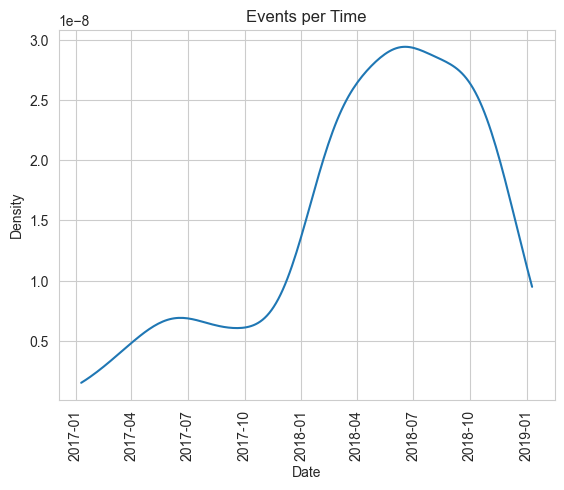

In [11]:
view_events_per_time_graph(log_i)

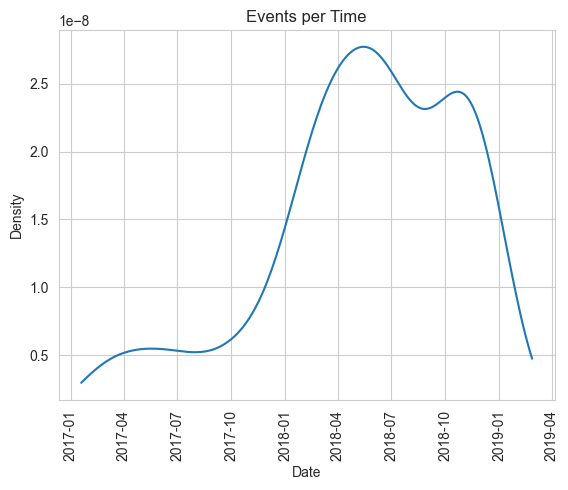

In [12]:
view_events_per_time_graph(log_d)

# Process Discovery (I)

To begin our exploration of process mining, we will focus on visualizing the most frequently occurring variants of the processes. 
This analysis will provide valuable insights into the different paths and patterns that are commonly followed within the processes.

We will start by defining functions for this purpose:

In [13]:
def get_variants_df(log):
    variants_dict = pm4py.get_variants(log)
    variants_arr = []
    idx = 1
    for variant, n in variants_dict.items():
        variant_in_dict = {'variant_number': idx, 'variant_count': n, 'variant_trace': variant}
        variants_arr.append(variant_in_dict)
        idx += 1

    variants_df = pd.DataFrame(variants_arr)
    variants_df = variants_df.sort_values(by='variant_count', ascending=False)

    return variants_df


def plot_top_n_variants(log, n_vars=10, title='Top 10 Variants'):
    variants_df = get_variants_df(log)
    sns.barplot(
        x='variant_count',
        y='variant_trace',
        data=variants_df[:n_vars],
        palette='viridis'
    ).set(title=title, xlabel='Occurrences', ylabel='');


def count_cases_ratio(log, n_vars=10):
    variants_df = get_variants_df(log)
    cases = log['case:id'].unique()
    count_cases_top_n = variants_df[:n_vars]['variant_count'].sum()
    return f'Top {n_vars} variants account for {count_cases_top_n:,} cases out of {len(cases):,}.'

In [14]:
variants_d = pm4py.get_variants(log_d)
variants_i = pm4py.get_variants(log_i)

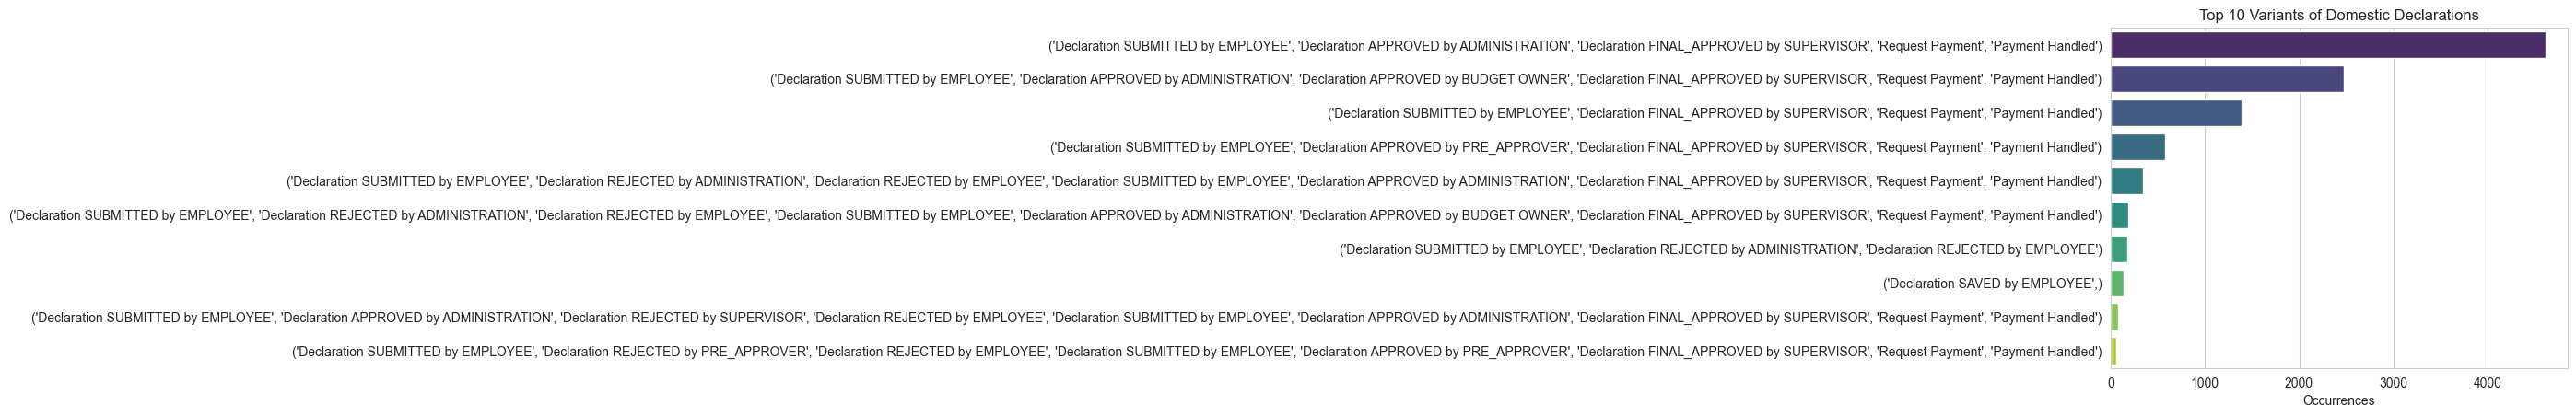

In [15]:
plot_top_n_variants(
    log_d, n_vars=10, 
    title='Top 10 Variants of Domestic Declarations'
)

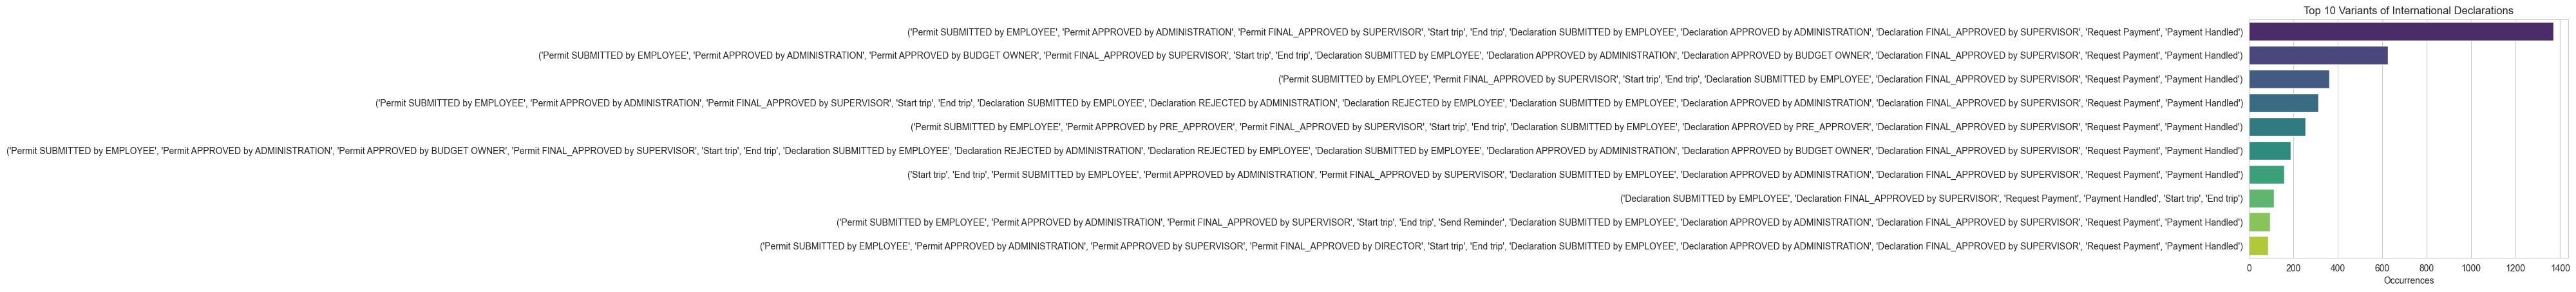

In [16]:
plot_top_n_variants(
    log_i, n_vars=10, 
    title='Top 10 Variants of International Declarations'
)

In [17]:
print(f'For domestic declarations: {count_cases_ratio(log_d, n_vars=10)}')
print(f'For international declarations: {count_cases_ratio(log_i, n_vars=10)}')

For domestic declarations: Top 10 variants account for 10,033 cases out of 10,500.
For international declarations: Top 10 variants account for 3,554 cases out of 6,449.


From the graphs above, we can observe that the international traces exhibit greater diversity compared to the domestic ones. 
This is primarily due to the combination of permit and declaration workflows within a single trace.

Interestingly, all the top seven variants of both international and domestic traces conclude with two system actions: "Request Payment" followed by "Payment Handled."

When examining the top six international traces, it becomes apparent that the initial part of each trace comprises actions related to the permit workflow, 
preceded by "Start trip" and "End trip" actions. Following this, the traces transition into actions associated with declarations.

## Petri Net (I)

We will continue our process exploration by constructing a Petri Net for the international and domestic datasets.

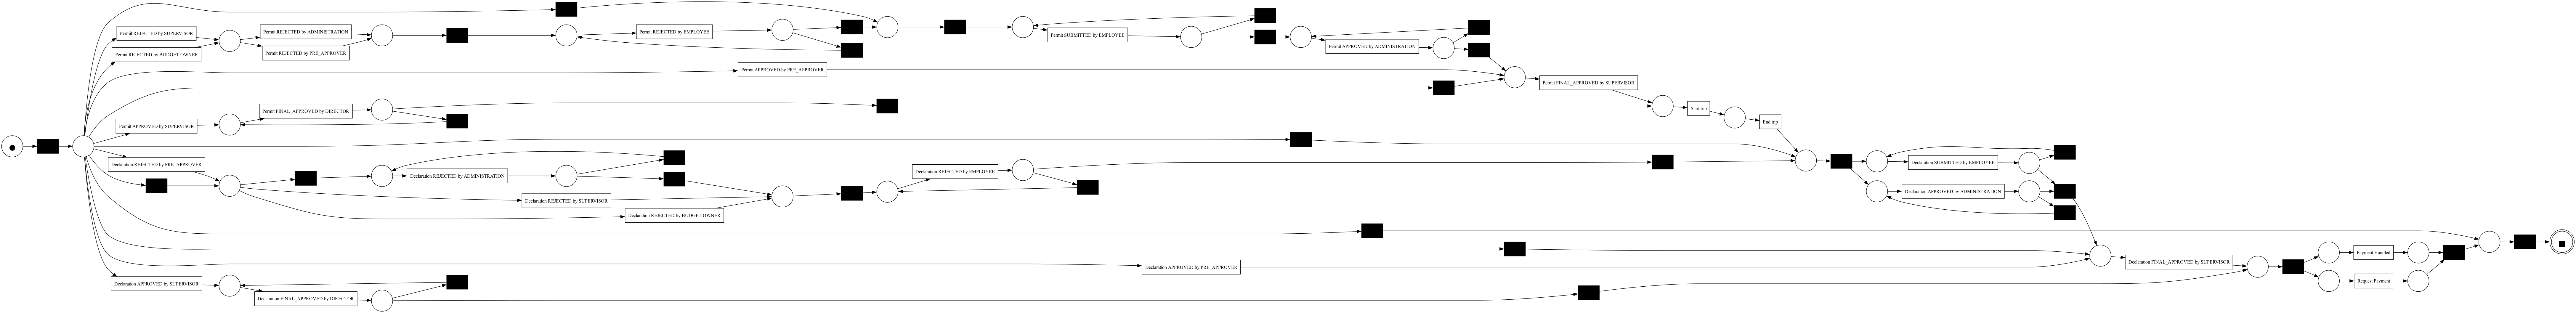

In [18]:
p_net_i, im_i, fm_i = pm4py.discover_petri_net_inductive(
    log=log_i,
    noise_threshold=.8,
    activity_key='concept:name',
    timestamp_key='time:timestamp',
    case_id_key='case:id'
)
pm4py.view_petri_net(p_net_i, im_i, fm_i)

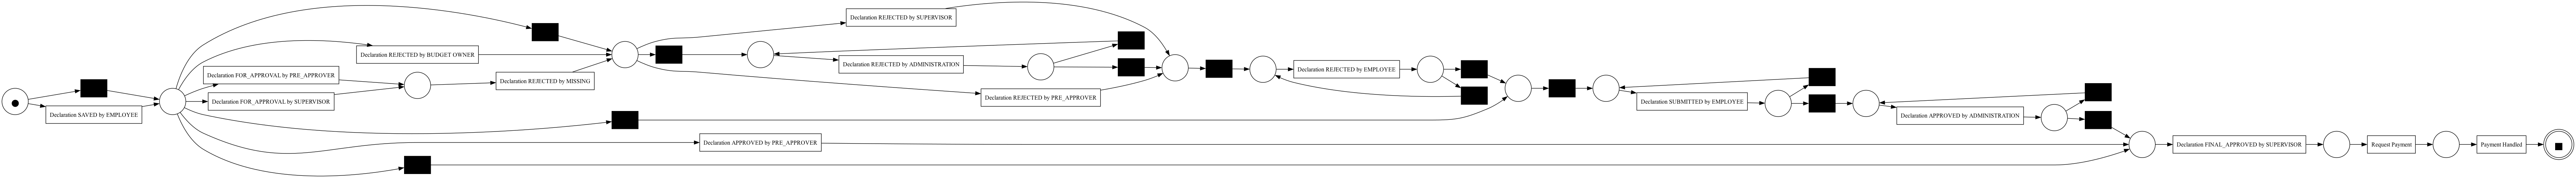

In [19]:
p_net_d, im_d, fm_d = pm4py.discover_petri_net_inductive(
    log=log_d,
    noise_threshold=.8,
    activity_key='concept:name',
    timestamp_key='time:timestamp',
    case_id_key='case:id'
)
pm4py.view_petri_net(p_net_d, im_d, fm_d)

After constructing a Petri Net using the unfiltered datasets, we are faced with the question: 
would it be beneficial to filter out the most frequent process chains in order to create a more comprehensive process description?

Based on our previous analysis, it is evident that the international workflows demonstrate a clear distinction between permit and declaration flows. If this distinction holds true, 
combining the declaration process from the international dataset with the domestic dataset could prove advantageous. 
This would allow us to develop a more generalized process description that encompasses both international and domestic workflows.

Additionally, we can utilize insights from the exploratory data analysis conducted earlier to further refine our dataset, 
in particularly we will choose top 6 international variants and top 3 domestic variants.
This includes filtering out traces with "zero value amounts" as well as removing duplicated logs in the international dataset.

In [20]:
# get top most common variants, using charts above
top_6_variants_i = get_variants_df(log_i)[:6]['variant_trace'].tolist()
top_3_variants_d = get_variants_df(log_d)[:3]['variant_trace'].tolist()

# filter out traces with top 6 variants
log_i_filtered = log_i[~log_i['case:concept:name'].isin(top_6_variants_i)]
log_d_filtered = log_d[~log_d['case:concept:name'].isin(top_3_variants_d)]

# filter out international traces with duplicated logs
duplicated_traces_i = log_i[log_i.groupby('id')['case:concept:name'].transform('nunique').gt(1)]['case:concept:name'].unique()
log_i_filtered = log_i_filtered[~log_i_filtered['case:concept:name'].isin(duplicated_traces_i)]

# filter out traces with zero value amounts
zero_amount_traces_i = log_i_filtered[log_i_filtered['case:Amount'] == 0]['case:concept:name'].unique()
zero_amount_traces_d = log_d_filtered[log_d_filtered['case:Amount'] == 0]['case:concept:name'].unique()

log_i_filtered = log_i_filtered[~log_i_filtered['case:concept:name'].isin(zero_amount_traces_i)]
log_d_filtered = log_d_filtered[~log_d_filtered['case:concept:name'].isin(zero_amount_traces_d)]

In [21]:
# combine international and domestic datasets for declarations
log_i_filtered_declarations = log_i_filtered[log_i_filtered['concept:name'].str.contains('Declaration')]
log_d_filtered_declarations = log_d_filtered[log_d_filtered['concept:name'].str.contains('Declaration')]

log_declarations = pd.concat([log_i_filtered_declarations, log_d_filtered_declarations])
log_permissions = log_i_filtered[log_i_filtered['concept:name'].str.contains('Permit')]

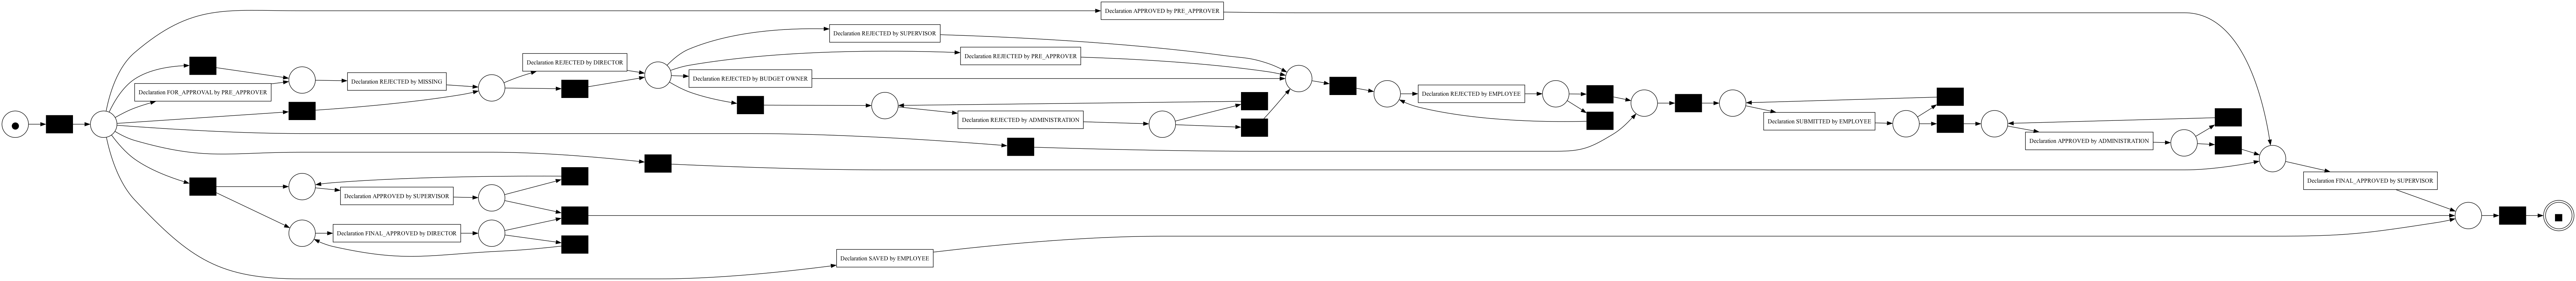

In [22]:
p_net_dec, im_dec, fm_dec = pm4py.discover_petri_net_inductive(
    log=log_declarations,
    noise_threshold=.8,
    activity_key='concept:name',
    timestamp_key='time:timestamp',
    case_id_key='case:id'
)
pm4py.view_petri_net(p_net_dec, im_dec, fm_dec)

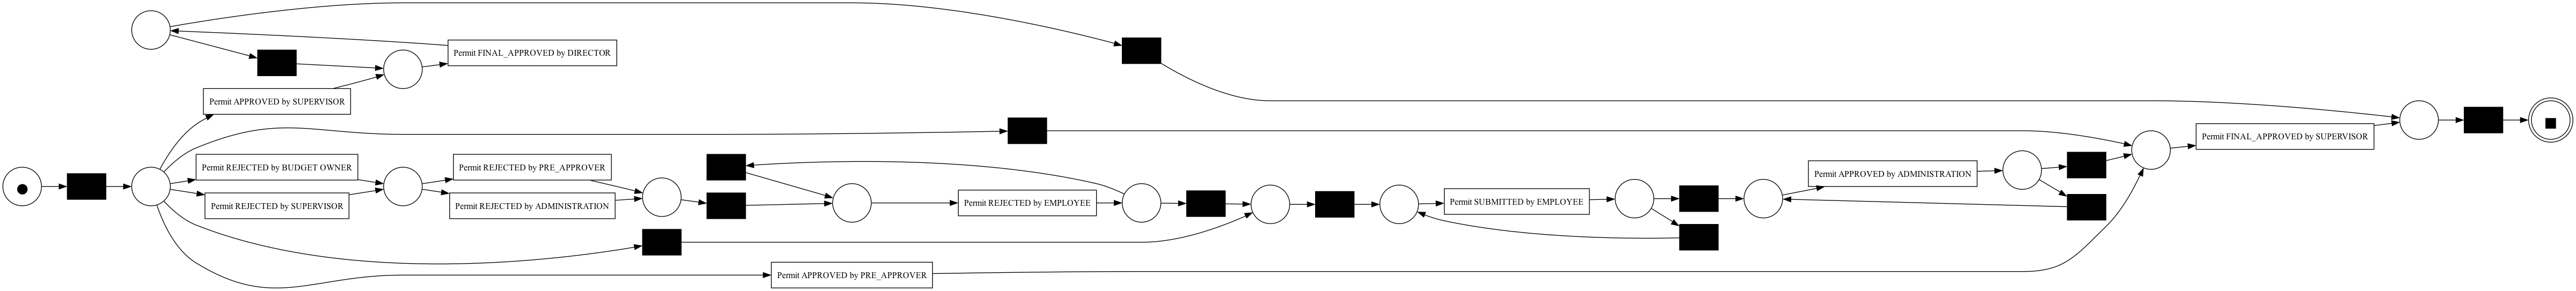

In [23]:
p_net_per, im_per, fm_per = pm4py.discover_petri_net_inductive(
    log=log_permissions,
    noise_threshold=.8,
    activity_key='concept:name',
    timestamp_key='time:timestamp',
    case_id_key='case:id'
)
pm4py.view_petri_net(p_net_per, im_per, fm_per)

Splitting the process into declarations and permissions allows us to clearly identify the workflows.

Workflows for permission and declarations follows similar patterns.
We can observe two branches: rejection and approval. 
If a submission is rejected, it leads to a new submission that can be approved by the ADMINISTRATION.

The approval branch is more straightforward. 
The permit must ultimately be approved either by the SUPERVISOR or by the DIRECTOR. 
However, in some cases, it may require pre-approval from other roles as well.

## Dataset based on Top 5 and Top 10 Variants (M)

To illustrate a more general purpose process modell, we extract the top variants of each dataset.

In [24]:
def filter_top_n_variants(log, n):

    df = log
    variants = pm4py.get_variants(df, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
    variants = dict(sorted(variants.items(), key=lambda item: item[1], reverse=True))  # sort dictionary by value in descending order

    top_variants = [list(variants.items())[i] for i in range(n)]
    
    valid_cases_list = []
    for variant in top_variants:
        grouped = df.groupby('case:concept:name')['concept:name'].apply(list)
        valid_cases = grouped[grouped.apply(lambda x: all(item in x for item in variant[0]) and len(x) == len(variant[0]))].index
        valid_cases_list.extend(valid_cases)
    
    filtered_df = df[df['case:concept:name'].isin(valid_cases_list)]

    return filtered_df

In [25]:
log_i_top_10 = filter_top_n_variants(log_i, 10)
log_d_top_5 = filter_top_n_variants(log_d, 5)

## Fitness (M)

In [26]:
print(f"Amount of unique cases in top 8 variants of international travel: {len(log_i_top_10['case:concept:name'].unique())}")
print(f"Amount of unique cases international travel: {len(log_i['case:concept:name'].unique())}")

Amount of unique cases in top 8 variants of international travel: 4355
Amount of unique cases international travel: 6449


In [27]:
def show_petri_net(log):
    net, im, fm = pm4py.discover_petri_net_inductive(
        log,
        noise_threshold=.8,
        activity_key='concept:name',
        timestamp_key='time:timestamp',
        case_id_key='case:id'
    )
    pm4py.view_petri_net(net, im, fm)

In [28]:
def show_fitness(log_x_top, log):
    net, im, fm = pm4py.discover_petri_net_inductive(log_x_top, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')

    fitness_tbr = pm4py.fitness_alignments(log, net, im, fm, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
    return fitness_tbr

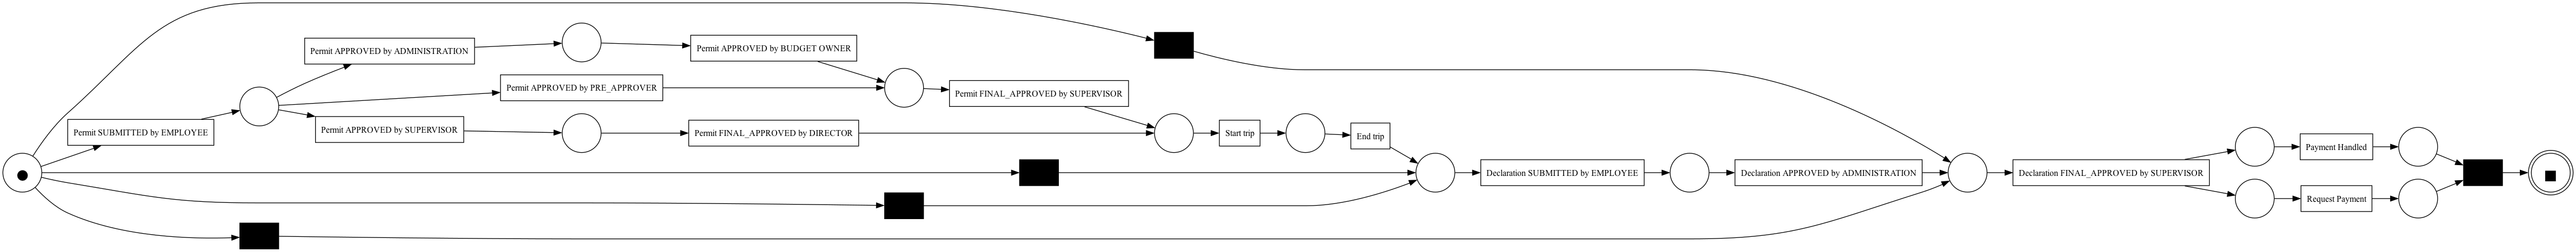

In [29]:
show_petri_net(log_i_top_10)

In [30]:
show_fitness(log_i_top_10, log_i)

aligning log, completed variants ::   0%|          | 0/753 [00:00<?, ?it/s]

{'percFitTraces': 81.62505814855017,
 'averageFitness': 0.9649237247442887,
 'percentage_of_fitting_traces': 81.62505814855017,
 'average_trace_fitness': 0.9649237247442887,
 'log_fitness': 0.9637374497208899}

While only considering 67% of cases with the top 10 variants of the international travel dataset, the log fitness still goes up to 96%.

In [31]:
print(f"Amount of unique cases in top 8 variants of domestic travel: {len(log_d_top_5['case:concept:name'].unique())}")
print(f"Amount of unique cases domestic travel: {len(log_d['case:concept:name'].unique())}")


Amount of unique cases in top 8 variants of domestic travel: 9403
Amount of unique cases domestic travel: 10500


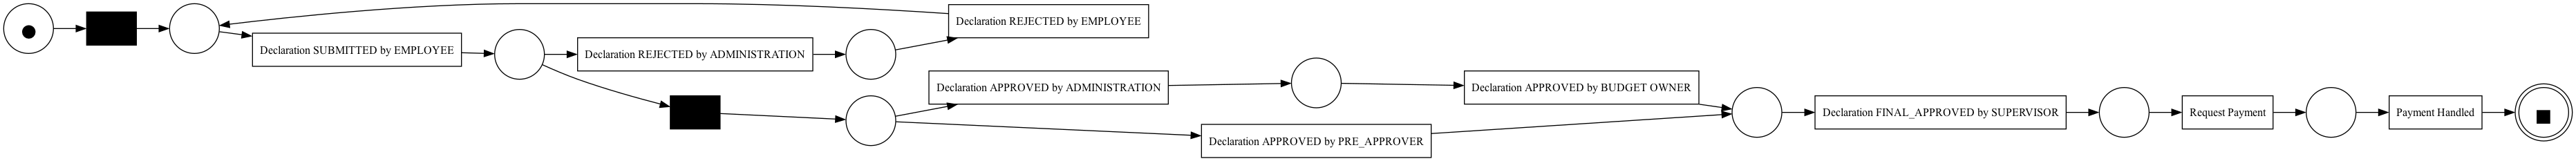

In [32]:
show_petri_net(log_d_top_5)

In [33]:
show_fitness(log_d_top_5, log_d)

aligning log, completed variants ::   0%|          | 0/99 [00:00<?, ?it/s]

{'percFitTraces': 92.00952380952381,
 'averageFitness': 0.9615393640349872,
 'percentage_of_fitting_traces': 92.00952380952381,
 'average_trace_fitness': 0.9615393640349872,
 'log_fitness': 0.9674543059920164}

Even with the domestic travel dataset a log_fitness of 96% can be achieved by using only the top 5. However, since the top 5 variants represent almost 90% of all cases, it may be possible to reduce to the top 3 variants.


# Specific Questions (M)

## How long do the different process instances take? Are there any notable patterns? (M)

### Average durations of the whole process

In [34]:
def avg_duration_of_cases(log):
    case_arr_avg = pm4py.get_case_arrival_average( #Gets the average difference between the start times of two consecutive cases
        log, 
        activity_key='concept:name', 
        case_id_key='case:concept:name', 
        timestamp_key='time:timestamp')
    return case_arr_avg  

In [35]:

duration_i = avg_duration_of_cases(log_i)
duration_d = avg_duration_of_cases(log_d)

print(f"International: {duration_i / 24} hours")
print(f"Domestic: {duration_d / 24} hours")

International: 447.0025136993383 hours
Domestic: 246.65215734831887 hours


The output above shows, that the average duration of the process for international travel is 447 hours. The Domestic Travel process, on the other hand, has a duration of 247 hours. The duration from the beginning to the end of each case was taken into account, from which an average was calculated.

### Average and Total duration of each activity

Now let's look at the duration by individual activities. These can give us first indications of possible bottlenecks.

To do this, a duration is first calculated for each entry in the logfile and appended as a new column. Here, it is assumed that the duration of an activity is the difference between the current timestamp of one activity and the timestamp of the previous activity. Therefore, the first activity of each case has no duration and gets marked as ``NaT``. However, in order to calculate only the durations within a case per activity, the data set is grouped by Case ID ```('case:concept:name')``` beforehand. We want to make sure that the activities of each case are presented in the correct order, so we sort secondarily by timestamp ```('time:timestamp')```. We have applied this to both datasets. The first 5 lines of each output can be seen as follows:

In [36]:
log_i = log_i.sort_values(['case:concept:name', 'time:timestamp'])
log_i['duration'] = log_i.groupby('case:concept:name')['time:timestamp'].diff()  # difference of one timestamp to next between two activities of one case
log_i['duration'].fillna(pd.Timedelta(seconds=0), inplace=True)
log_i[:5]

id  org:resource  \
27174          st_step 1004_0  STAFF MEMBER   
27175          st_step 1005_0  STAFF MEMBER   
27176          st_step 1006_0  STAFF MEMBER   
27177  rv_travel permit 992_6  STAFF MEMBER   
27178  rv_travel permit 992_7  STAFF MEMBER   

                              concept:name            time:timestamp  \
27174         Permit SUBMITTED by EMPLOYEE 2018-03-01 09:55:17+00:00   
27175    Permit APPROVED by ADMINISTRATION 2018-03-01 09:55:21+00:00   
27176  Permit FINAL_APPROVED by SUPERVISOR 2018-03-01 14:01:48+00:00   
27177                           Start trip 2018-03-18 23:00:00+00:00   
27178                             End trip 2018-03-22 23:00:00+00:00   

             org:role case:Permit travel permit number  \
27174        EMPLOYEE         travel permit number 993   
27175  ADMINISTRATION         travel permit number 993   
27176      SUPERVISOR         travel permit number 993   
27177        EMPLOYEE         travel permit number 993   
27178        EMPLOYEE         travel permit number 993   

        case:DeclarationNumber  case:Amount  case:RequestedAmount  \
27174  declaration number 1003    361.39224             361.39224   
27175  declaration number 1003    361.39224             361.39224   
27176  declaration number 1003    361.39224             361.39224   
27177  declaration number 1003    361.39224             361.39224   
27178  declaration number 1003    361.39224             361.39224   

      case:Permit TaskNumber case:Permit BudgetNumber  case:OriginalAmount  \
27174                UNKNOWN               budget 994            361.39224   
27175                UNKNOWN               budget 994            361.39224   
27176                UNKNOWN               budget 994            361.39224   
27177                UNKNOWN               budget 994            361.39224   
27178                UNKNOWN               budget 994            361.39224   

      case:Permit ProjectNumber case:concept:name  \
27174                   UNKNOWN  declaration 1002   
27175                   UNKNOWN  declaration 1002   
27176                   UNKNOWN  declaration 1002   
27177                   UNKNOWN  declaration 1002   
27178                   UNKNOWN  declaration 1002   

      case:Permit OrganizationalEntity case:travel permit number  \
27174        organizational unit 65460  travel permit number 993   
27175        organizational unit 65460  travel permit number 993   
27176        organizational unit 65460  travel permit number 993   
27177        organizational unit 65460  travel permit number 993   
27178        organizational unit 65460  travel permit number 993   

       case:Permit RequestedBudget           case:id     case:Permit ID  \
27174                  1273.252058  declaration 1002  travel permit 992   
27175                  1273.252058  declaration 1002  travel permit 992   
27176                  1273.252058  declaration 1002  travel permit 992   
27177                  1273.252058  declaration 1002  travel permit 992   
27178                  1273.252058  declaration 1002  travel permit 992   

          case:Permit id case:BudgetNumber case:Permit ActivityNumber  \
27174  travel permit 992     budget 146827               activity 995   
27175  travel permit 992     budget 146827               activity 995   
27176  travel permit 992     budget 146827               activity 995   
27177  travel permit 992     budget 146827               activity 995   
27178  travel permit 992     budget 146827               activity 995   

       case:AdjustedAmount         duration  
27174            361.39224  0 days 00:00:00  
27175            361.39224  0 days 00:00:04  
27176            361.39224  0 days 04:06:27  
27177            361.39224 17 days 08:58:12  
27178            361.39224  4 days 00:00:00

In [37]:
log_d = log_d.sort_values(['case:concept:name', 'time:timestamp'])
log_d['duration'] = log_d.groupby('case:concept:name')['time:timestamp'].diff()  # difference of one timestamp to next between two activities of one case
log_d['duration'].fillna(pd.Timedelta(seconds=0), inplace=True)
log_d[:5]

id  org:resource  \
12788          st_step 100004_0  STAFF MEMBER   
12789          st_step 100003_0  STAFF MEMBER   
12790          st_step 100002_0  STAFF MEMBER   
12791  dd_declaration 100000_19        SYSTEM   
12792  dd_declaration 100000_20        SYSTEM   

                                   concept:name            time:timestamp  \
12788         Declaration SUBMITTED by EMPLOYEE 2018-01-30 08:20:07+00:00   
12789    Declaration APPROVED by ADMINISTRATION 2018-02-07 08:58:46+00:00   
12790  Declaration FINAL_APPROVED by SUPERVISOR 2018-02-08 09:59:05+00:00   
12791                           Request Payment 2018-02-09 11:42:49+00:00   
12792                           Payment Handled 2018-02-12 16:31:20+00:00   

             org:role             case:id   case:concept:name  \
12788        EMPLOYEE  declaration 100000  declaration 100000   
12789  ADMINISTRATION  declaration 100000  declaration 100000   
12790      SUPERVISOR  declaration 100000  declaration 100000   
12791       UNDEFINED  declaration 100000  declaration 100000   
12792       UNDEFINED  declaration 100000  declaration 100000   

      case:BudgetNumber     case:DeclarationNumber  case:Amount  \
12788      budget 86566  declaration number 100001   600.844121   
12789      budget 86566  declaration number 100001   600.844121   
12790      budget 86566  declaration number 100001   600.844121   
12791      budget 86566  declaration number 100001   600.844121   
12792      budget 86566  declaration number 100001   600.844121   

             duration  
12788 0 days 00:00:00  
12789 8 days 00:38:39  
12790 1 days 01:00:19  
12791 1 days 01:43:44  
12792 3 days 04:48:31

Now we can group the data set by activity ```('concept:name')```. Here the average duration is calculated using the ``mean()`` function.

In [38]:
def get_average_duration_per_activity(log):
    average_durations = log.groupby('concept:name')['duration'].mean()
    average_durations = average_durations.sort_values(ascending=False)
    return average_durations

Because we want to take into account not only the average duration, but also the total duration, we use ```sum()``` to sum up the duration per activity in a separate function.

In [39]:
def get_total_duration_per_activity(log):
    
    #log['duration_days'] = log['duration'].dt.days
    log['duration_seconds'] = log['duration'].dt.total_seconds()
    total_seconds_per_activity = log.groupby('concept:name')['duration_seconds'].sum()
    total_durations = pd.to_timedelta(total_seconds_per_activity, unit='s')

    #total_durations = log.groupby('concept:name')['duration'].sum()
    total_durations = total_durations.sort_values(ascending=False)
    log = log.drop('duration_seconds', axis = 1)
    return total_durations

In [40]:
def visualize_durations(log):

    average_durations = get_average_duration_per_activity(log)
    average_durations_hours = average_durations.dt.total_seconds() / 3600 # Conversion to hours

    total_durations = get_total_duration_per_activity(log) 
    total_durations_days  = total_durations.dt.total_seconds() / 86400 # Conversions from seconds to days
    

    plt.figure(figsize=(24, 30))

    plt.subplot(2, 1, 1)

    sns.barplot(x=average_durations_hours.values, y=average_durations_hours.index, palette="viridis")

    plt.ylabel('Activity')
    plt.xlabel('Average Duration (hours)')
    plt.title('Average Duration for Each Activity in Hours')

    for i, value in enumerate(average_durations_hours.values):  # Display values next to the bars
        plt.text(value + 0.01 * value, i + 0.11, f"{value:.2f}", fontsize=14)

    plt.subplot(2, 1, 2)

    sns.barplot(x=total_durations_days.values, y=total_durations_days.index, palette="viridis")

    plt.ylabel('Activity')
    plt.xlabel('Total Duration (days)')
    plt.title('Total Duration for Each Activity in Days')

    for i, value in enumerate(total_durations_days.values):  # Display values next to the bars
        plt.text(value + 0.01 * value, i + 0.11, f"{value:.2f}", fontsize=14)

    plt.show();

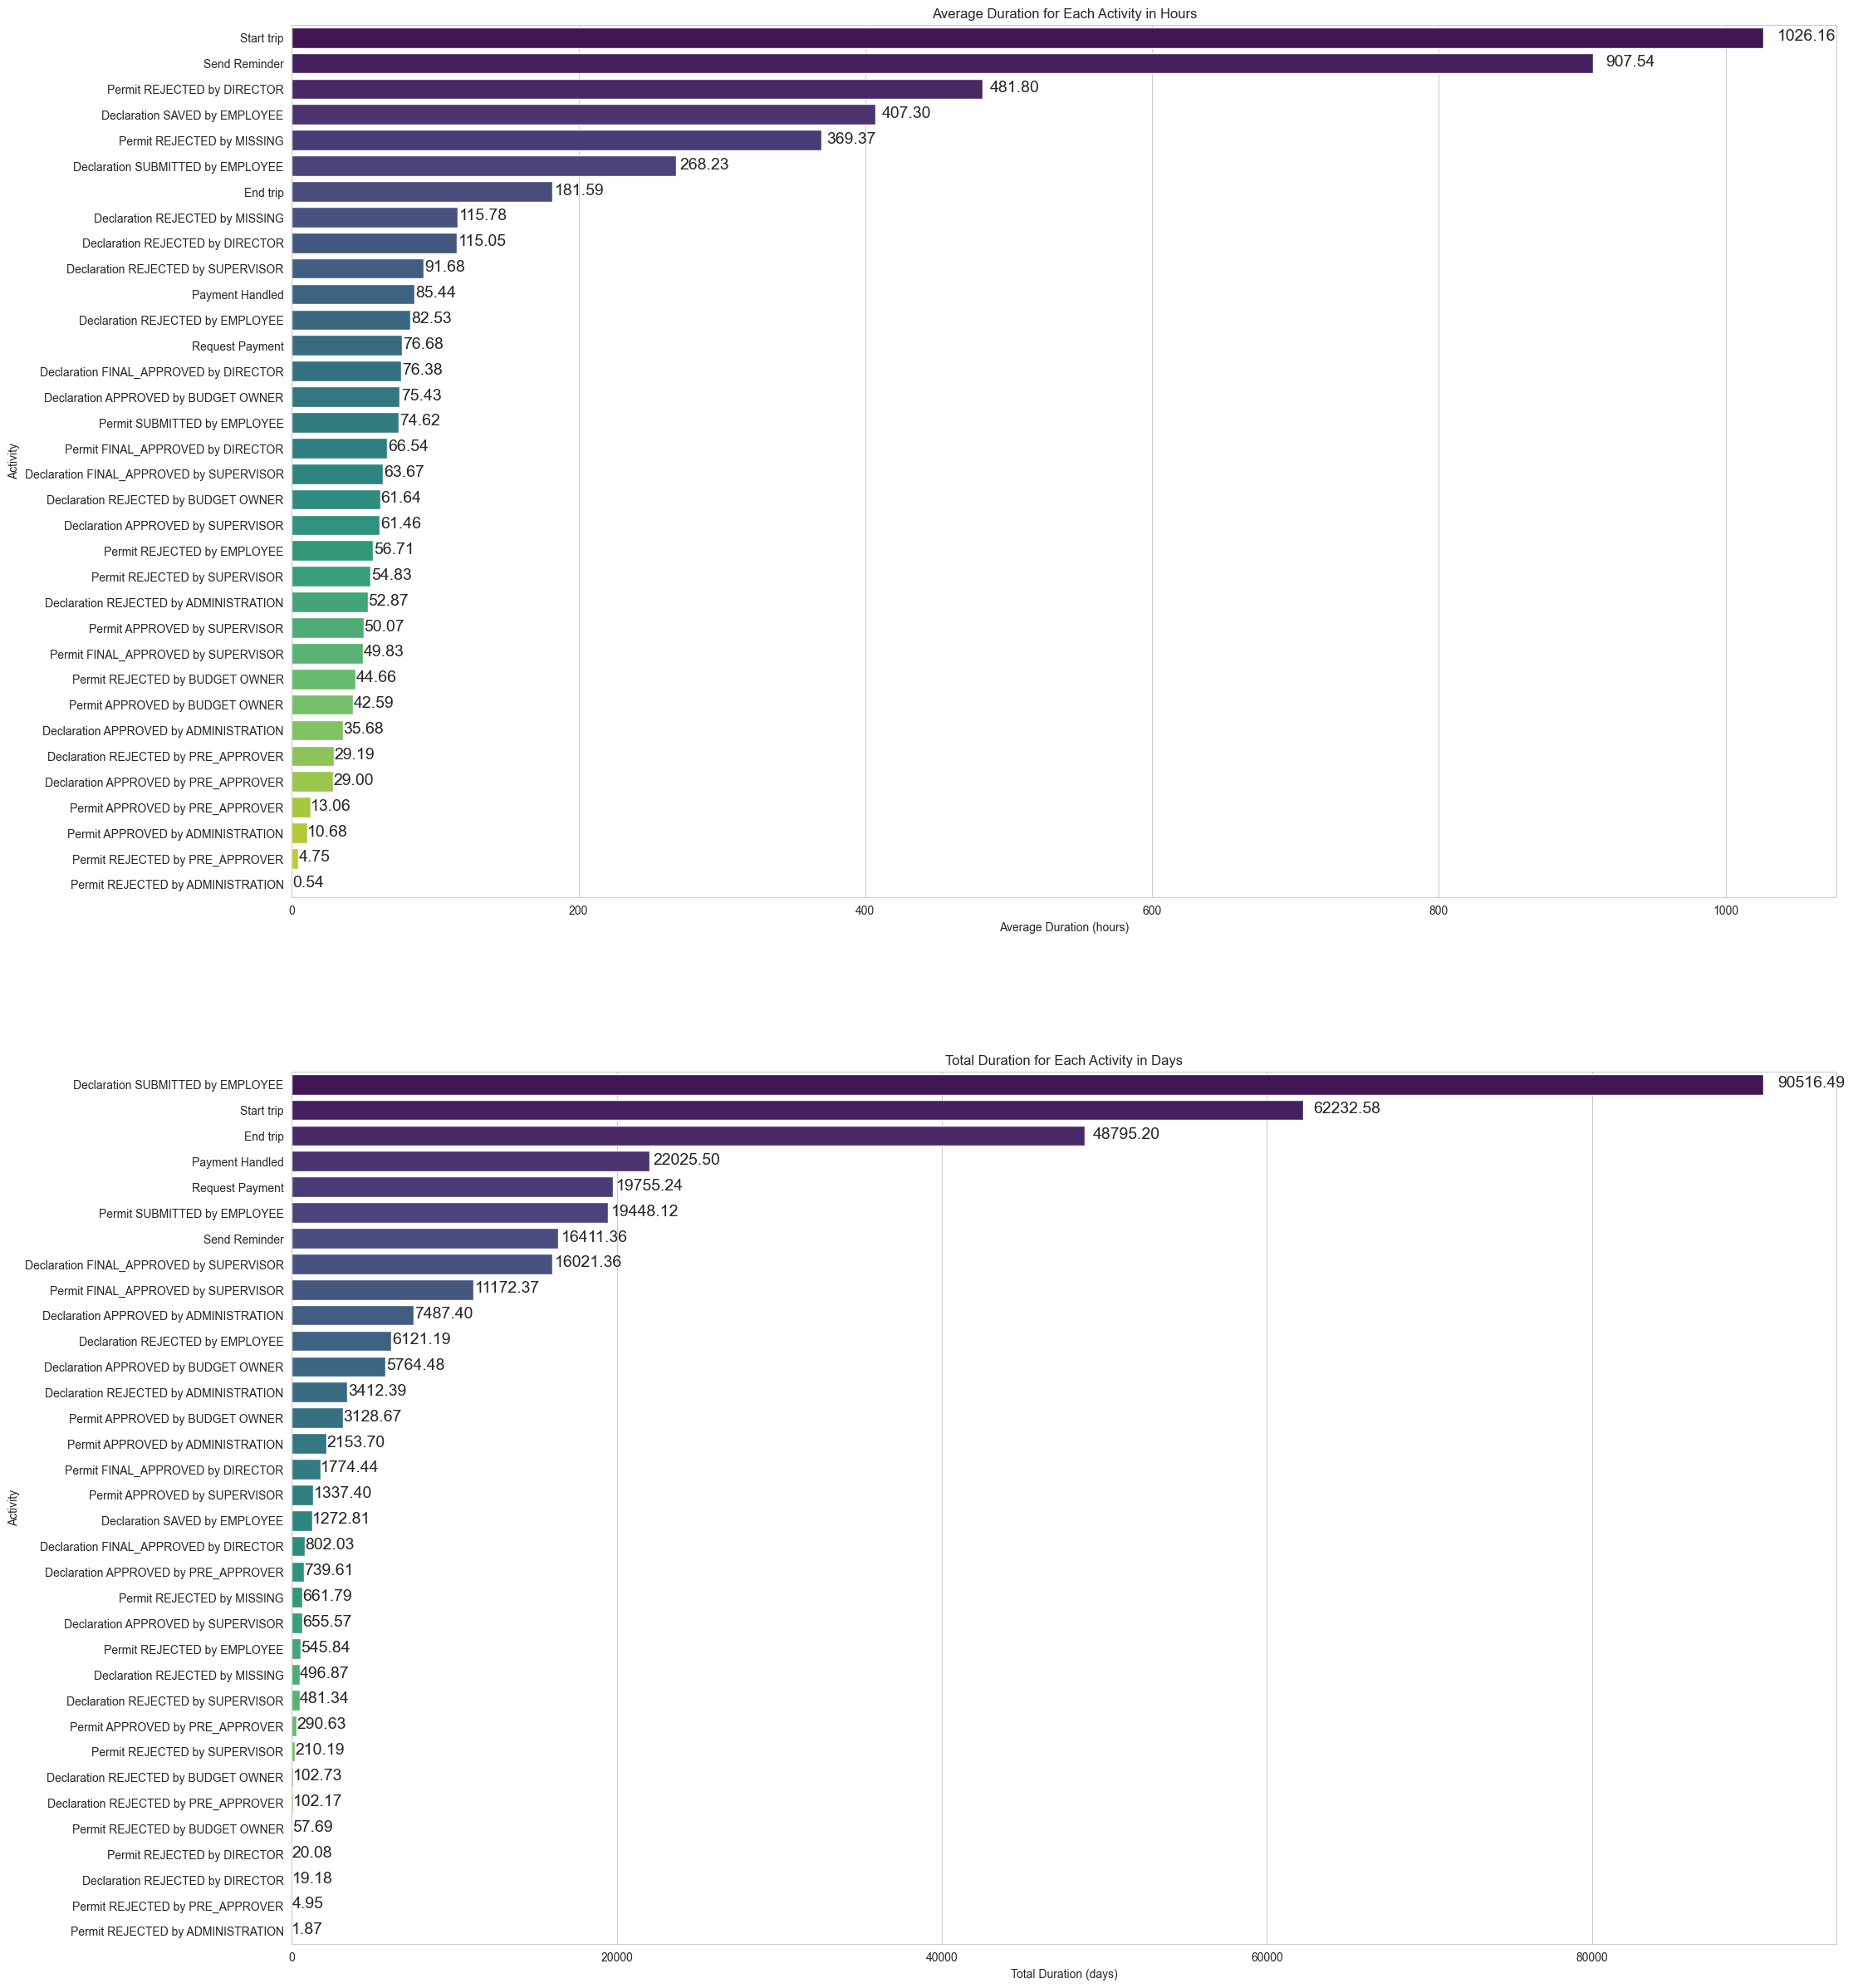

In [41]:
visualize_durations(log_i)

As shown in the graph above, two barplots are shown for the Average Duration for each Activity and the Total duration for each Activity. This one was generated based on the data set ``log_i`` for international travel. The following one was generated accordingly based on the date set ``log_d`` for domestic travel.

When examining average durations, the activity ``'Start trip'`` has a high average duration of about 42.5 days or 1026 hours. This is followed by the ``'Send Reminder'`` activity which averages close to 38 days with about 900 hours. The third position in terms of length is occupied by the ``'Permit REJECTED by DIRECTOR'`` activity, which typically spans around 481 hours or 20 days. These considerable durations indicate areas in the process where tasks might be encountering significant delays.

On the other hand, when we consider the total durations, the activity ```'Declaration SUBMITTED by EMPLOYEE'``` accumulates to 90516 days. This suggests that even though its average duration of 268 hours or 11 days isn't the highest, the activity occurs frequently. The ``'Start trip'`` activity has a total of 62232 days, and the ``'End trip'`` activity accumulates 48795 days.

Furthermore, some activities, like ``'Permit REJECTED by ADMINISTRATION'``, show a relatively short total duration when compared to their average durations, hinting that they might not occur frequently. The varying durations across activities related to approvals and rejections by different entities such as the ``'DIRECTOR'``, ``'SUPERVISOR'``, and ``'ADMINISTRATION'`` might point to inconsistencies in the process or differing priorities among these roles.

One can observe, that activities related to permit approval or rejection by various entities, such as the ``'DIRECTOR'`` or ``'MISSING'``, tend to have longer average durations. This might indicate that the permit approval process is a key area that could benefit from optimization. Moreover, while the Declaration ``'REJECTED by MISSING'`` activity has an average duration of approximately 114 hours or approxemately 5 days , its total duration is 496 days. This suggests that the frequency of such rejections is high, potentially pointing to issues with data or information quality. On the flip side, activities like ``'Permit REJECTED by ADMINISTRATION'`` and ``'Permit REJECTED by PRE_APPROVER'`` exhibit shorter average durations, hinting at a swifter rejection process in these scenarios.

Moreover, while activities like Declaration ``'SAVED by EMPLOYEE'`` and ``'Permit REJECTED by MISSING'`` might individually take time, they don't seem to occur as frequently as others, given their absence from the top total durations. Lastly, there's a noticeable variation in the durations for activities related to ``'Permit'``. For example, ``'Permit REJECTED by DIRECTOR'``  averages 481 hours, while ``'Permit REJECTED by PRE_APPROVER'`` averages just about 4.75 hours.

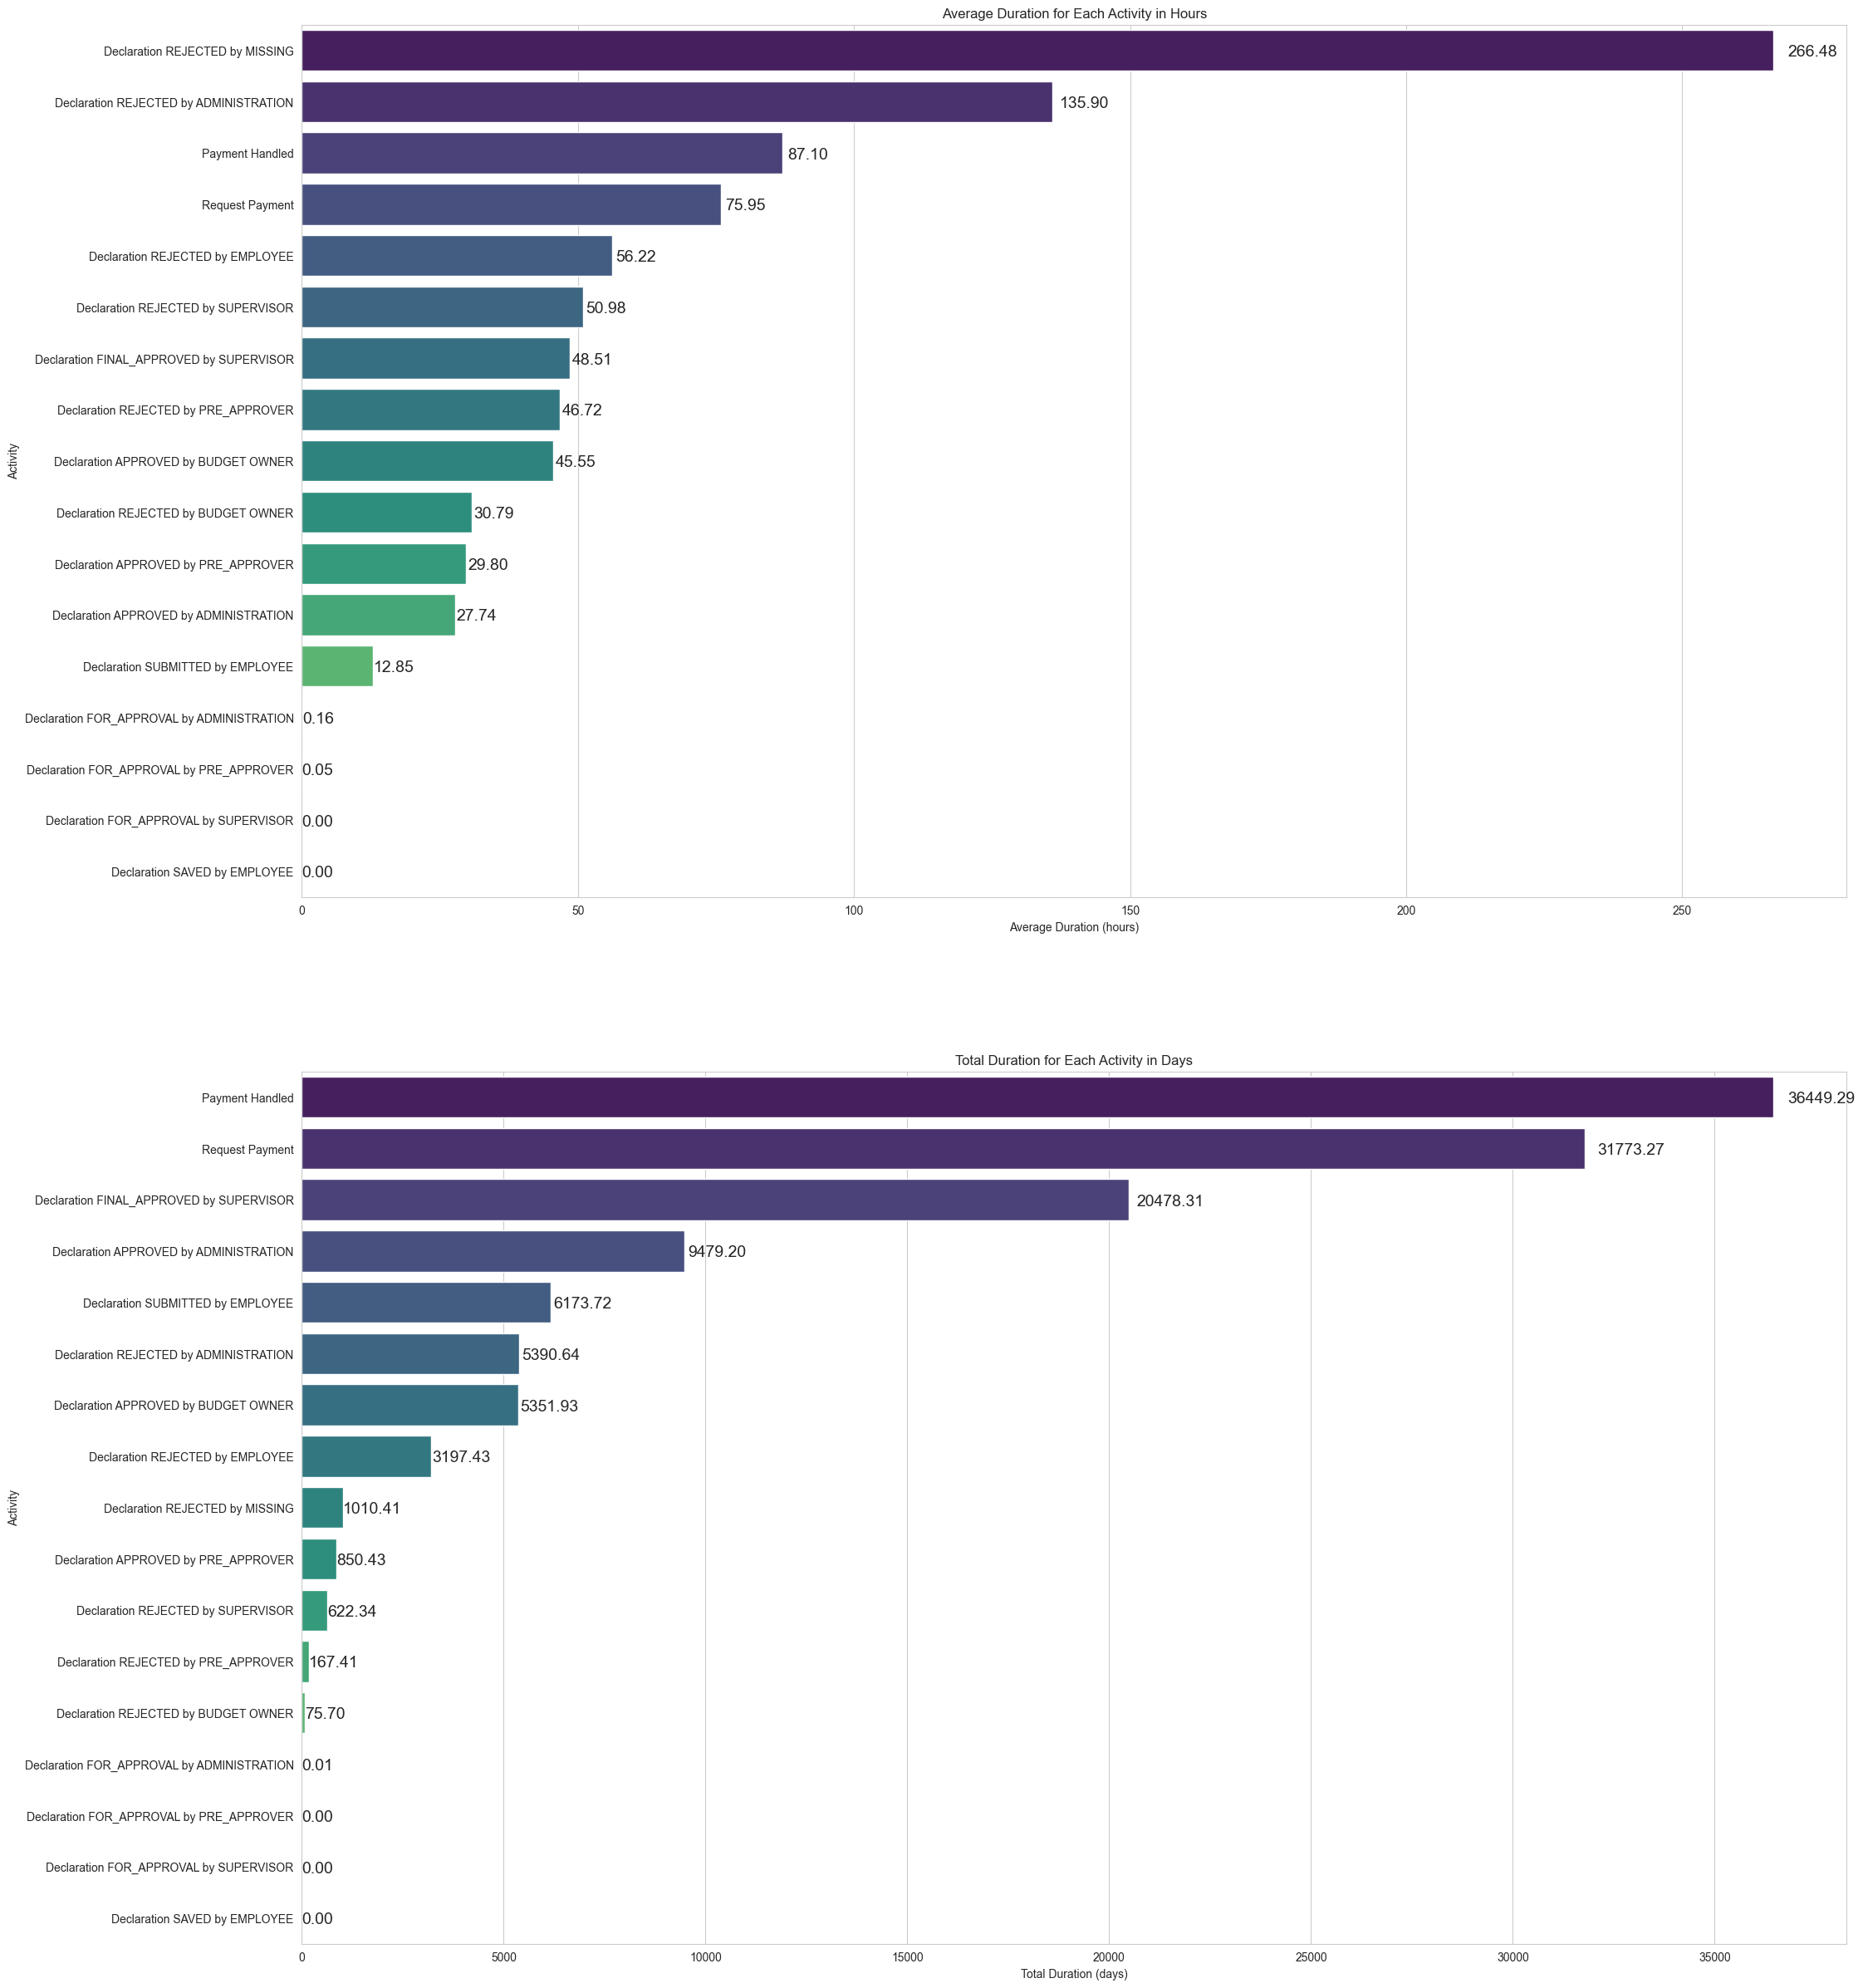

In [42]:
visualize_durations(log_d)

The activity with the longest average duration is ``'Declaration REJECTED by MISSING'``, which takes an average of 266 hours or approximately 11 days. This duration suggests a significant delay when items are rejected by an here unknown role. The next activity with a long average duration is ``'REJECTED by ADMINISTRATION'``, taking with 135 hours about 5 days and 16 hours, indicating another potential area of inefficiency. The activity ``'Payment Handled'`` has an average duration of approximately 3.5 days. Given that this is a crucial step in most processes, it's worth investigating why it takes such a long time.

A glance at the chart for total duration offers new insights. The most time consuming activities are the those handled by the resource ``'SYSTEM'``, which are ``'Request Payment'`` and ``'Payment Handled'``.  The latter is at the top with a total of 36449 days, making it the most time-consuming activity overall. The activity ``'FINAL_APPROVED by SUPERVISOR'`` has a total duration of 20478 days, suggesting that while its average duration isn't the longest, it occurs frequently and thus accumulates significant time. Request Payment is also notable with a total duration of 31773 days. As the starting activity of most cases the value for ``'SUBMITTED by EMPLOYEE'`` usually should be ``NaT`` or ``0``. But in this diagramm the total duration for ``'SUBMITTED by EMPLOYEE'`` represents the durations of those recycled declrations coming back from rejected declarations. 

Another interesting observation is that activities like ``'FOR_APPROVAL by ADMINISTRATION'``, ``'FOR_APPROVAL by PRE_APPROVER'``, and ``'FOR_APPROVAL by SUPERVISOR'`` have very short average durations, implying that the initial approval process is quick. However, the subsequent approval or rejection might be causing delays. 

## Are there any bottlenecks? If yes, where? If yes, can you think of any reasons? (M)

Now that we have an impression of which activities are noteworthy due to their average or total duration, we will uncover between which successive activities the bottlenecks appear in detail. This can best be done by visualising the process landscape.

In [43]:
def show_duration_dfg(log):
    filtered_log = pm4py.filter_case_performance(  # log needs further filtering for adequate representation
        log, 
        0, # min (1 min)
        1728000.0, #max (20d) in seconds
        timestamp_key='time:timestamp', 
        case_id_key='case:concept:name')  
        
    performance_dfg, start_activities, end_activities = pm4py.discover_performance_dfg(
        filtered_log, 
        case_id_key='case:concept:name', 
        activity_key='concept:name', 
        timestamp_key='time:timestamp')

    pm4py.view_performance_dfg(
        performance_dfg, 
        start_activities, 
        end_activities, 
        format='png')

In [44]:
def show_occurences_dfg(log):
    dfg, start_activities, end_activities = pm4py.discover_dfg(
        log, 
        case_id_key='case:concept:name', 
        activity_key='concept:name', 
        timestamp_key='time:timestamp')
    
    pm4py.view_dfg(
        dfg, 
        start_activities, 
        end_activities, 
        format='png')

In [45]:
def get_variants(log):
    variants = pm4py.get_variants(log, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
    return variants

As seen in the output below there are 753 variants for international and 99 variants for domestic travel. So we filter out a adequate amount of top variants to prevent special cases or outliers from distorting the process map.   
In addition, with ``pm4py`` it is only possible to display the average duration or the total amount of occurences between each activity.

In context of our bottleneck analysis, those sequential activities that occur frequently and at the same time have a high average duration, are relevant.

In [46]:
print(f"Amount of Varariants for international travel: {len(get_variants(log_i))}")
print(f"Amount of Varariants for domestic travel: {len(get_variants(log_d))}")

Amount of Varariants for international travel: 753
Amount of Varariants for domestic travel: 99


### Process Map - Bottneneck Analysis: International Travel (M)

In [47]:
log_i_t15 = filter_top_n_variants(log_i, 15)
print(f"Amount of unique cases for internationaötravel: {len(log_i['case:concept:name'].unique())}")
print(f"Amount of unique cases for top 15 variants of international travel: {len(log_i_t15['case:concept:name'].unique())}")

Amount of unique cases for internationaötravel: 6449
Amount of unique cases for top 15 variants of international travel: 4627


For the dataset of international travel, the top 15 of 753 variants can be used to represent 4627 out of a total of 6449 unique cases, which enables the representation of 71% of the process landscape.

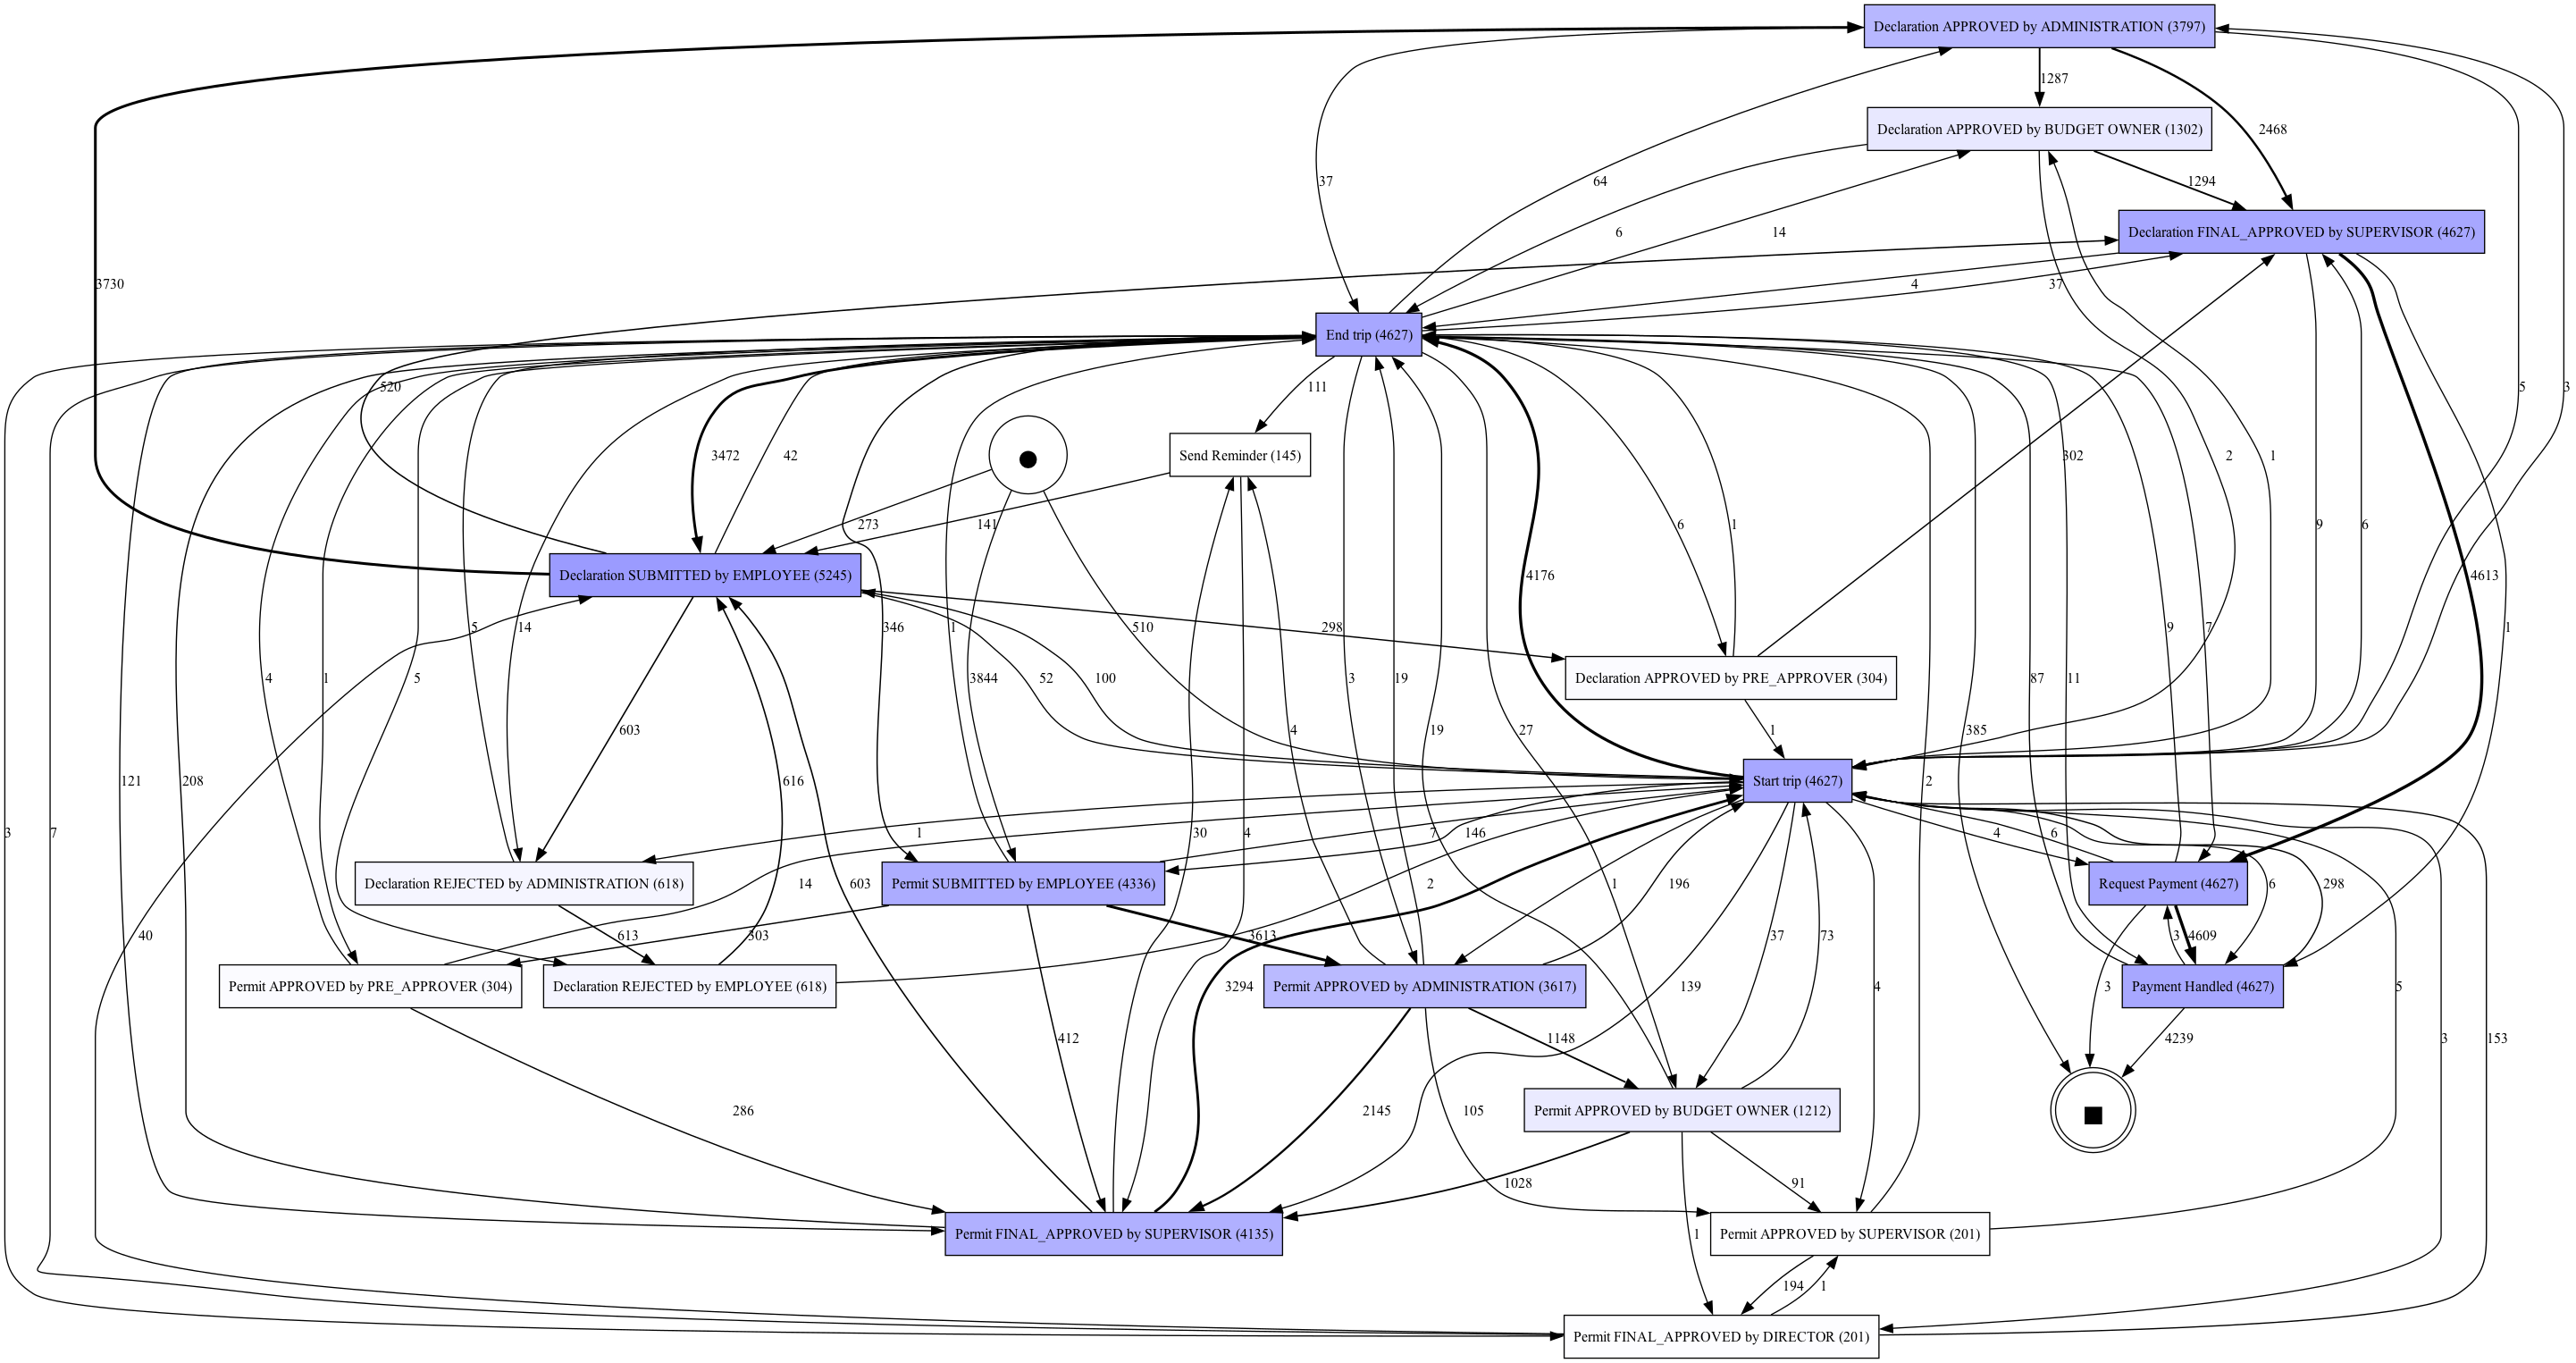

In [48]:
show_occurences_dfg(log_i_t15)

The diagram of international travel shows a complex process landscape.
However, it can be seen that as the end point of most variants, most occurences are between ``'Request Payment'`` and ``'Payment Handled'`` with a value of 4609. This is followed by the sequence ``'Start Trip'`` to ``'End Trip'`` with, 4176 occurrences. This sequence would not necessarily have to be considered as a candidate for a bottleneck, as the journeys last as long as they do, which may vary alot. The activity ``'Declaration SUBMITTED by EMPLOYEE'`` brings together a total of 5245 cases. As seen in the output below, this activity is usually positioned at the 5th or 6th position of the entire process which also qualifies it as a potential bottleneck.


In [49]:
def return_activity_position(log, activity):
    act_pos = pm4py.get_activity_position_summary( # returns a dictionary which summarize the positions of the activities in the different cases of the event log
        log, 
        activity, 
        activity_key='concept:name', 
        case_id_key='case:concept:name', 
        timestamp_key='time:timestamp')

    return act_pos

In [50]:
return_activity_position(log_i_t15, 'Declaration SUBMITTED by EMPLOYEE')

{5: 2383, 6: 1295, 4: 531, 8: 376, 0: 273, 9: 234, 7: 73, 3: 59, 2: 21}

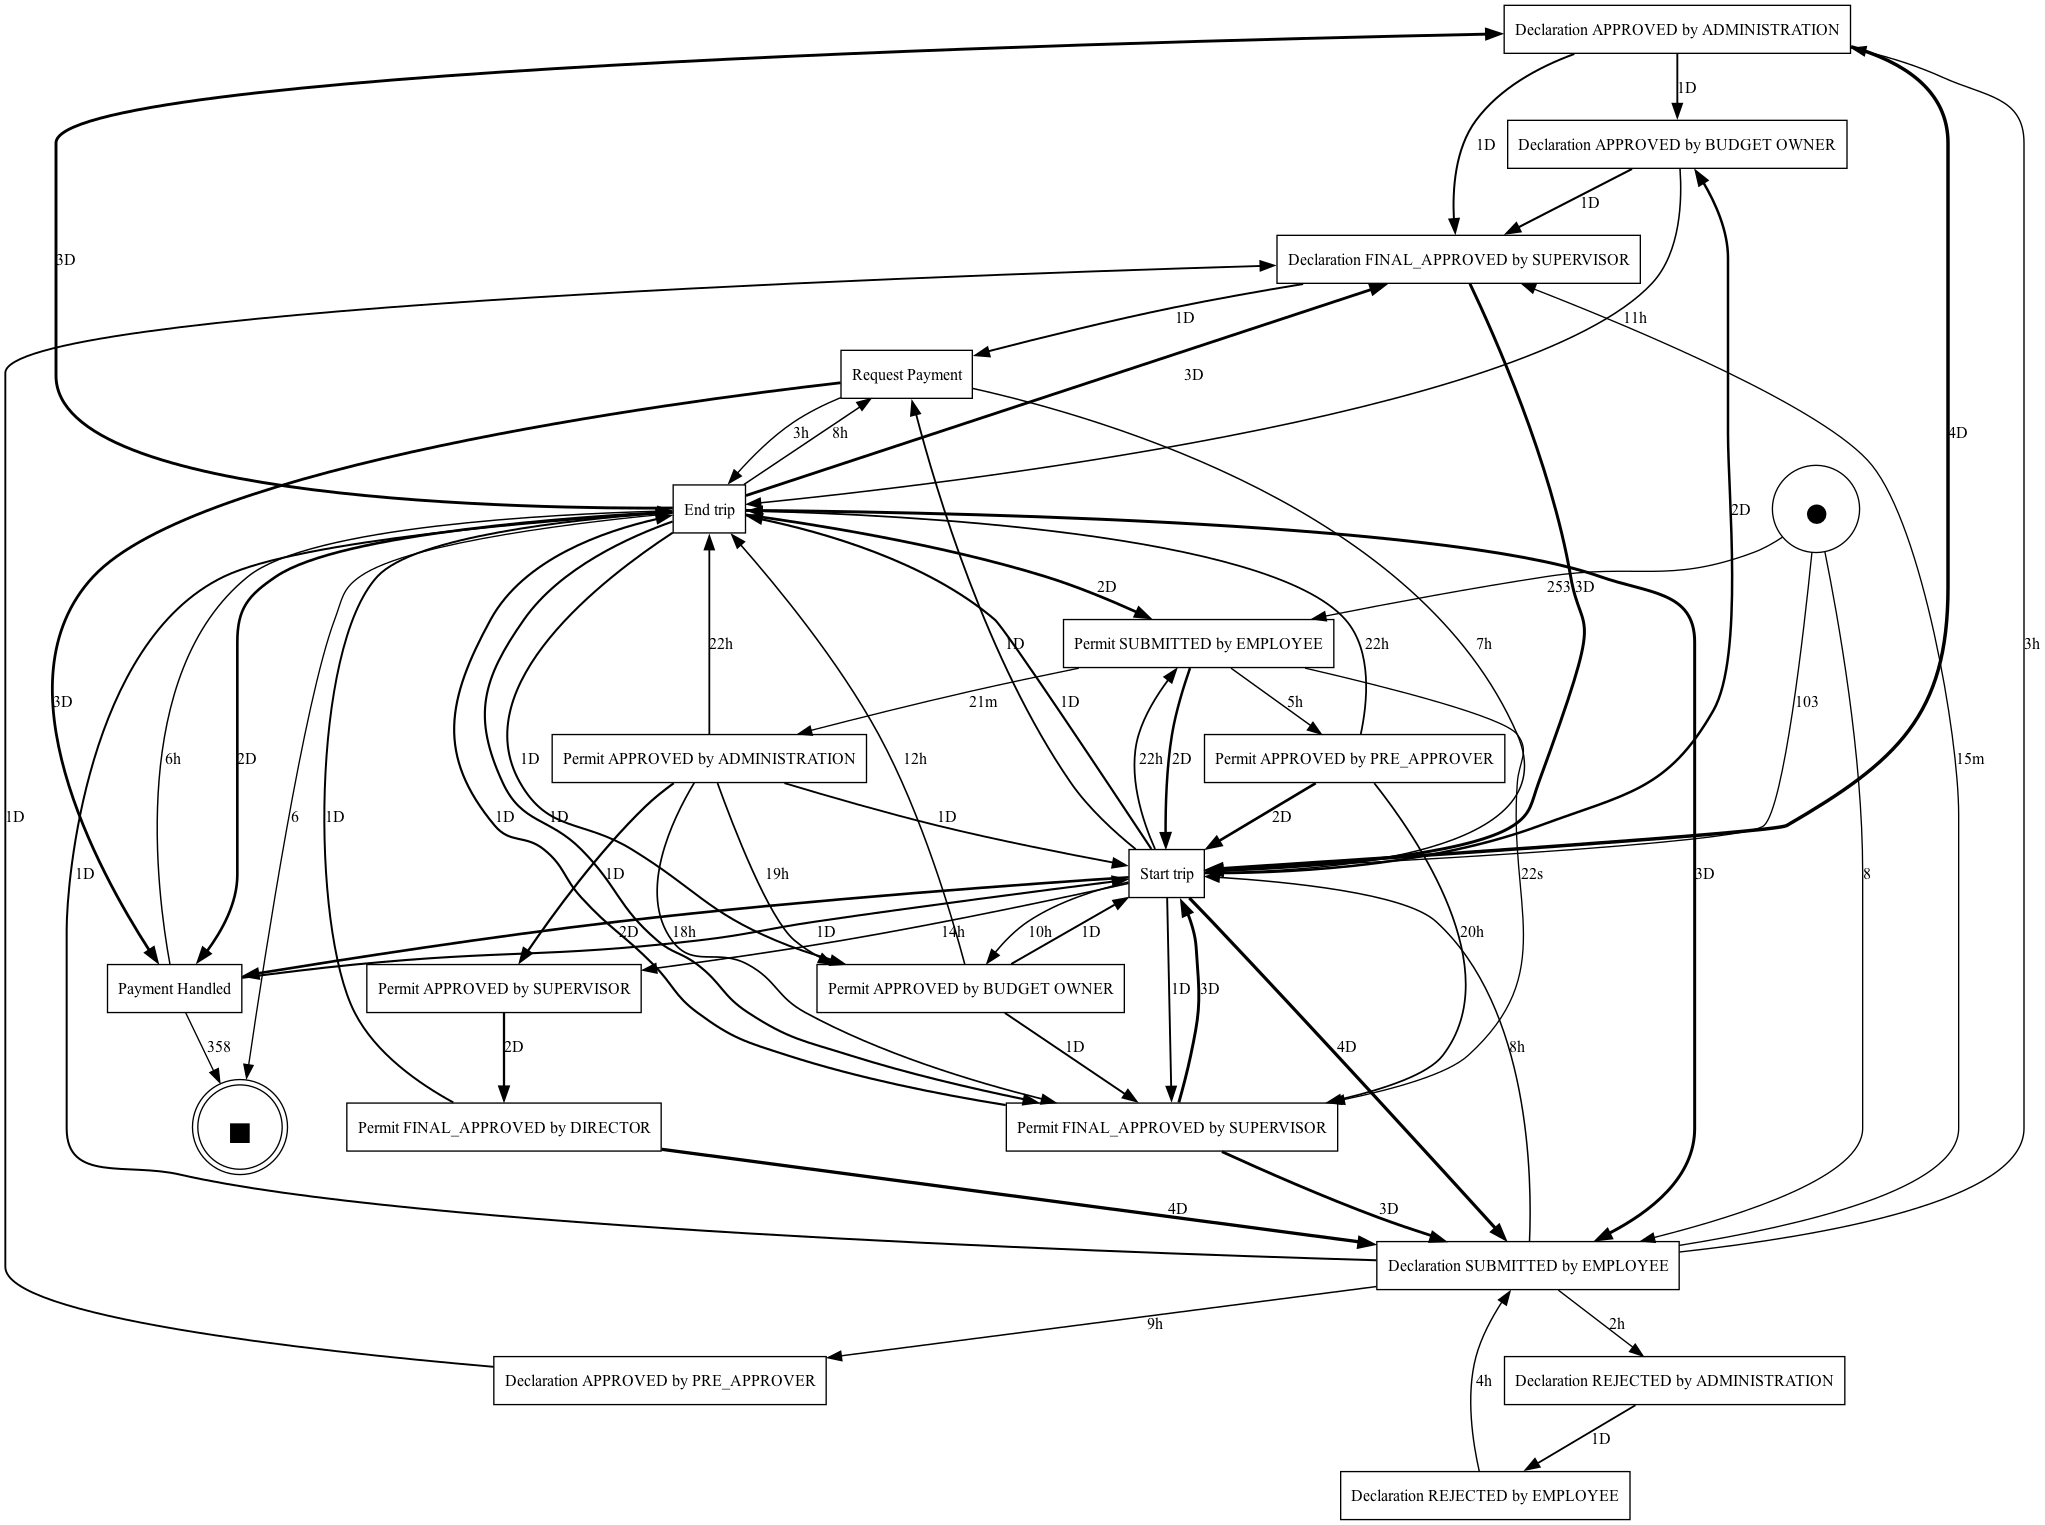

In [51]:
show_duration_dfg(log_i_t15)

Within the activity ``'Declaration SUBMITTED by EMPLOYEE'``, the role ``'EMPLOYEE'`` takes between 3 and 4 days to complete. Together with the high volume as shown in the previous chapter, the highest total duration accumulates to around 90500 days total. Similarly, the activities of the 'SYSTEM' like 'Payment Handled' and 'Request Payment' amass an amount of 22000 and 19750 days.  

### Process Map - Bottneneck Analysis: Domestic Travel (M)

In [52]:
log_d_t10 = filter_top_n_variants(log_d, 10)

print(f"Amount of unique cases for domestic travel: {len(log_d['case:concept:name'].unique())}")
print(f"Amount of unique cases for top 10 variants of domestic travel: {len(log_d_t10['case:concept:name'].unique())}")

Amount of unique cases for domestic travel: 10500
Amount of unique cases for top 10 variants of domestic travel: 10033


Using only the top 10 of 99 variants of the domestic travel dataset, 10033 of a total of 10500 unique cases can be displayed.

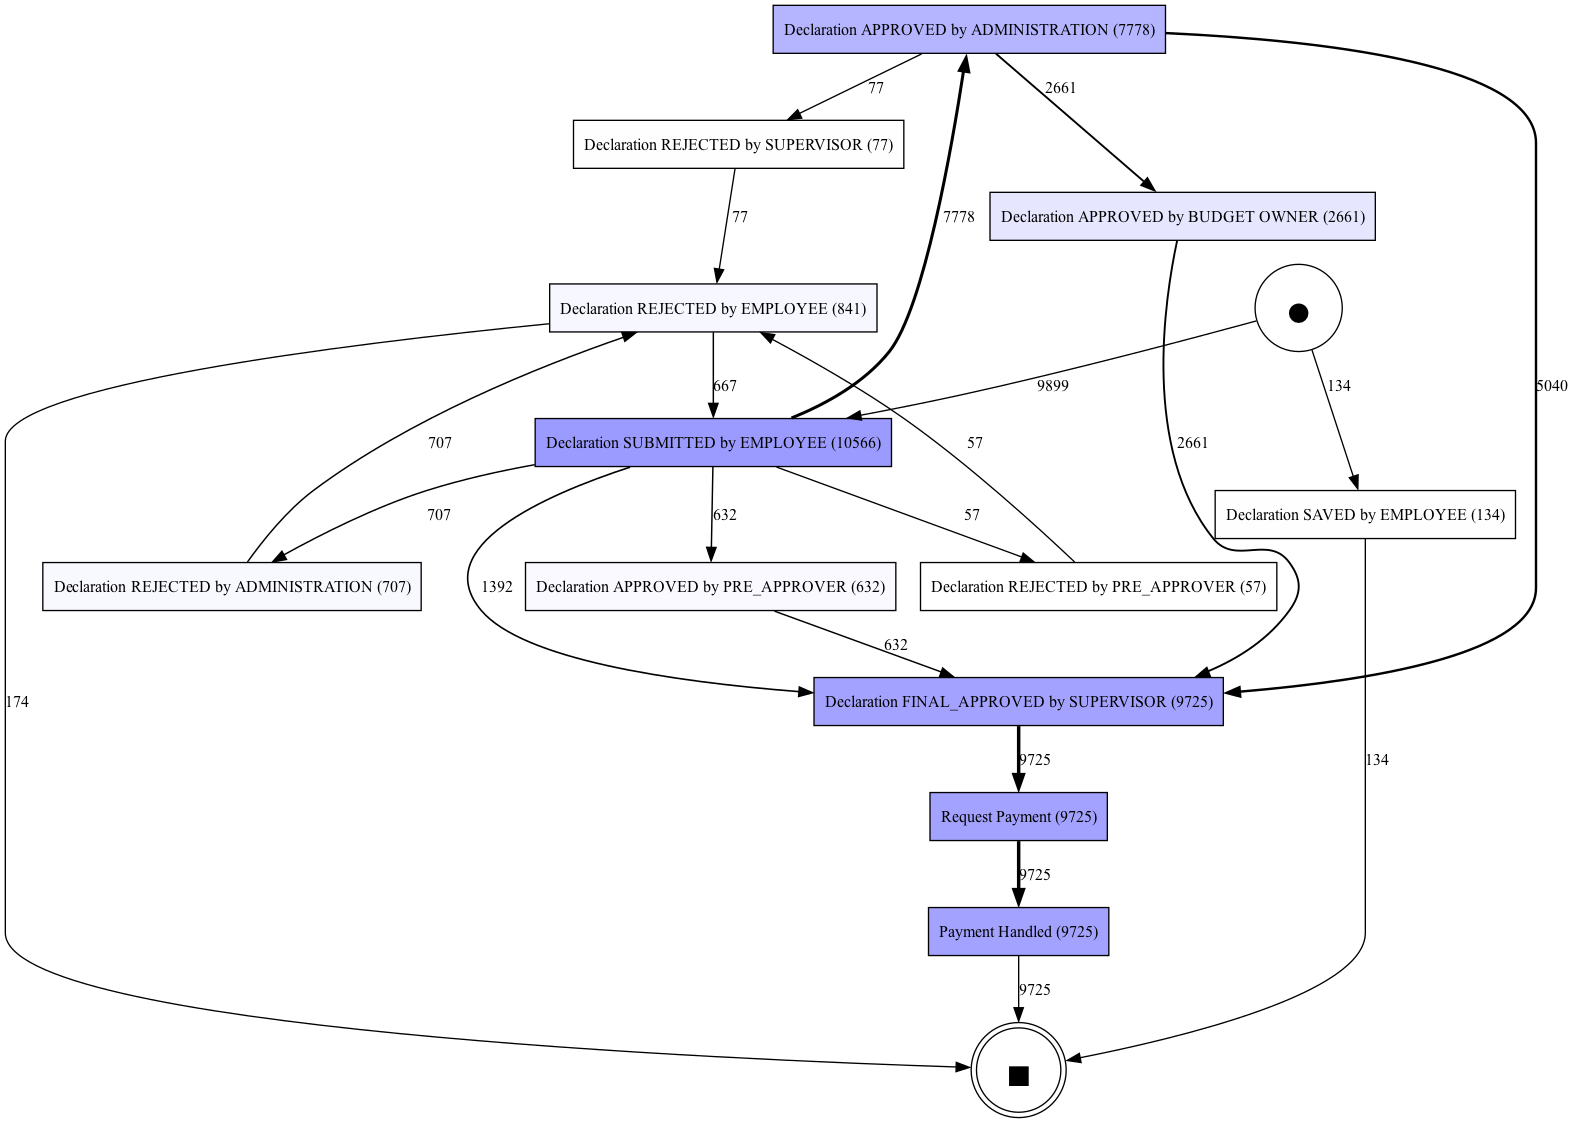

In [53]:
show_occurences_dfg(log_d_t10)

At first glance, similar to the international travel dataset, the activities handled by the resource ``'SYSTEM'`` (``'Request Payment'`` -> ``'Payment Handled'``) show a high number of consecutive activities. This is due to the fact that all accepted applications must lead to these activities. Another interesting candidate with the same number of consecutive activities is the one that leads from ``'Declaration FINAL_APPROVED by SUPERVISOR'`` to ``'Request Payment'``. In addition, with 7985 occurencies the path bewteen the beginning of the whole process  ``'Declaration SUBMITTED by EMPLOYEE'`` and ``'Declaration APPROVED by ADMINISTRATION'`` should also be examined more closely. Finally, the activity ``'Declararation FINAL_APPROVED by SUPERVISOR'`` performed by the role ``'SUPERVISOR'`` is relevant, as a total of 9725 (5040 + 2661 + 1392 + 632 ) cases lead to this activity. This means more than 90% of the total amount of cases depent on the reviewing speed of the ``'SUPERVISOR'``.

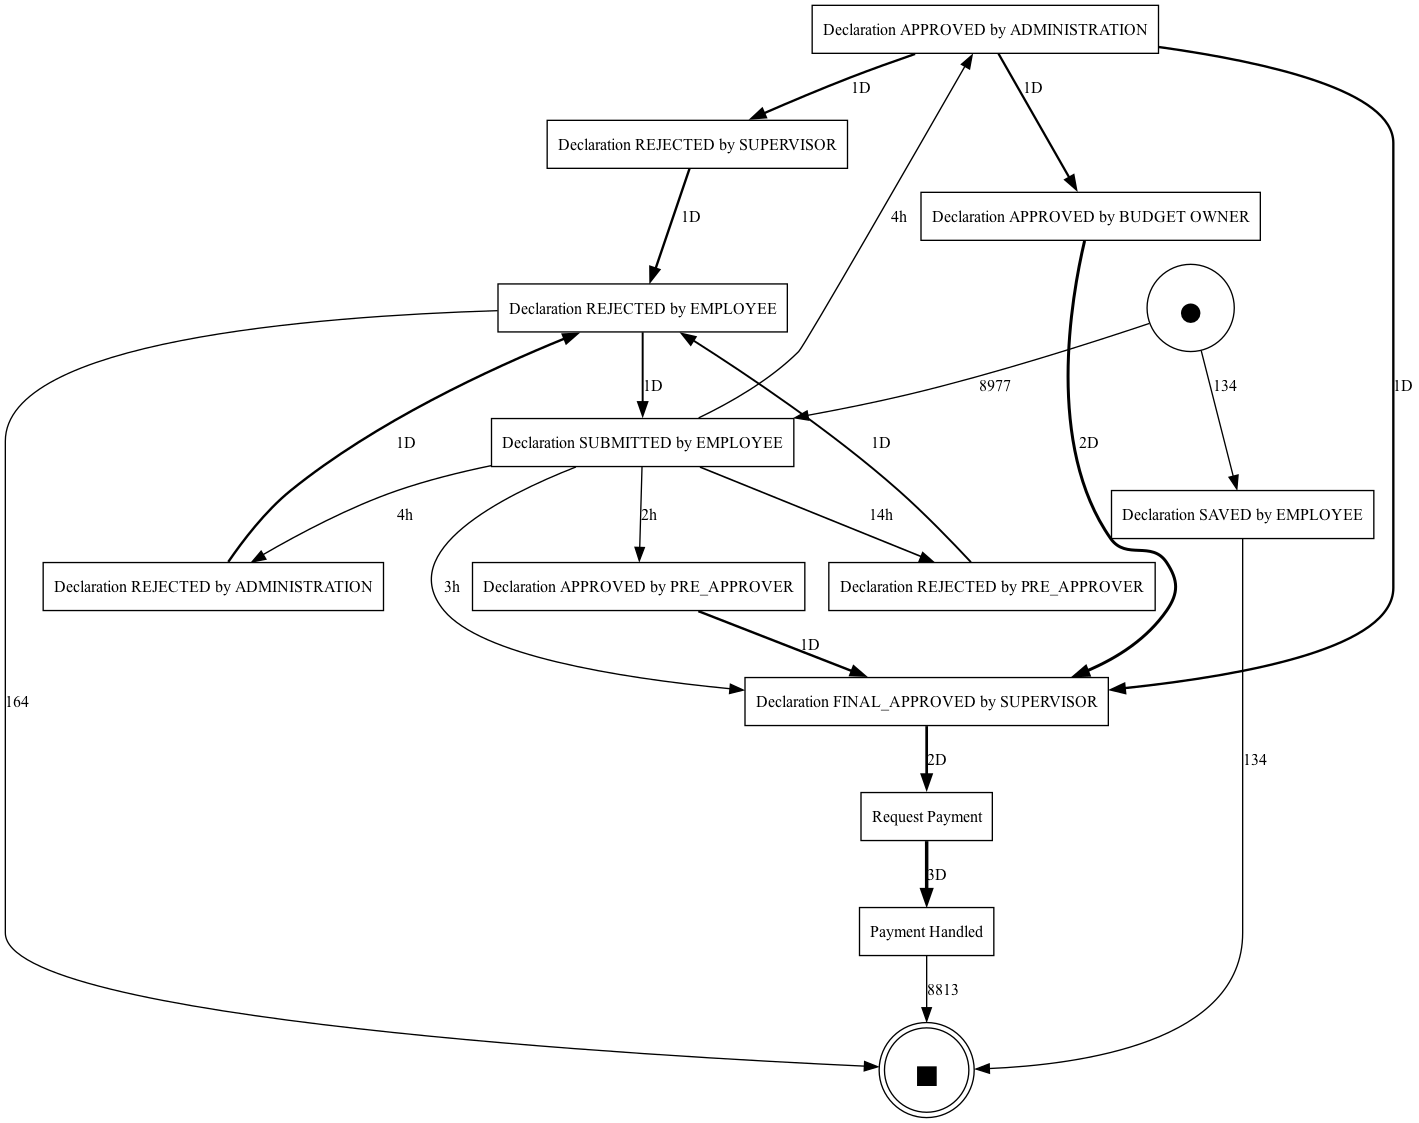

In [54]:
show_duration_dfg(log_d_t10)

In this process diagram, the average duration between individual activities is now plotted. It can be seen that despite the high volume, the duration of 3 hours between ``'Declaration SUBMITTED by EMPLOYEE'`` and ``'Declaration APPROVED by ADMINISTRATION'`` is less of a concern than others. As already suspected in the previous chapter, there is a clear bottleneck between ``'Delcaration FINAL_APPROVED by SUPERVISOR'``, ``'Request Payment'`` and ``'Payment Handled'`` with and average duration of 2 and 3 days. This raises the question of why an activity handled by a ``'SYSTEM'`` comes to such an average duration, whereas it is rather expected that the assigned tasks should or could be completed almost instantly. For a final approval, the ``'SUPERVISOR'`` needs between 1 and 2 days. Interestingly, the ``'SUPERVISOR'`` only needs 3 hours for declarations that have been submitted directly by an ``'EMPLOYEE'``.

In [55]:
def filter_duration_by_actvity(log, activity_1, activity_2):

    log = log.sort_values(by=['case:concept:name', 'time:timestamp'])

    log['previous_activity'] = log.groupby('case:concept:name')['concept:name'].shift(1)

    # Filtern Sie die Zeilen heraus, in denen die beiden Aktivitäten aufeinander folgen
    log = log[(log['concept:name'] == activity_1) & (log['previous_activity'] == activity_2)]

    log['duration_seconds'] = log['duration'].dt.total_seconds()
    total_seconds_per_activity = log.groupby('concept:name')['duration_seconds'].sum()
    total_durations = pd.to_timedelta(total_seconds_per_activity, unit='s')

    total_durations = total_durations.sort_values(ascending=False)
    
    total_durations_days = total_durations.dt.total_seconds() / 86400
    log = log.drop('duration_seconds', axis = 1)
    log = log.drop('previous_activity', axis = 1)

    return total_durations_days




## How many applications get rejected? Can you find any reasons? (M)

### Amount of rejections
First we take a look at the total total amount of rejections. Here we filter those activities containing ``'REJECTED'``. The filtered data set cotains now rejections by certain role and ```'REJECTED by EMPLOYEE'```. However, most rejections of a certain role lead to the activity ``'REJECTED by EMPLOYEE'``. Therefore, it is sufficient for the time being to filter for all activities that contain ``'REJECTED by EMPLOYEE'``. The output of the amount of rejected application of each data set can be seen below.

In [56]:

log_i_r = log_i[log_i["concept:name"].str.contains('REJECTED by EMPLOYEE')]  # Includes Rejections of Permits
log_d_r = log_d[log_d["concept:name"].str.contains('REJECTED by EMPLOYEE')]


len_log_i_r = len(log_i_r)
len_log_d_r = len(log_d_r)
len_unique_case_i = len(log_i['case:concept:name'].unique())
len_unique_case_d = len(log_d['case:concept:name'].unique())


print(f"Amount of rejected applications for international travel: {len_log_i_r}")
print(f"Amount of rejected applications for domestic travel: {len_log_d_r}")
print("-"*75)
print(f"Amount of unique cases for international travel: {len_unique_case_i}")
print(f"Amount of unique cases for domestic travel: {len_unique_case_d}")
print("-"*75)
print(f"Rejection rate for for international travel: {(len_log_i_r/len_unique_case_i)*100}%")
print(f"Rejection rate for for domestic travel: {(len_log_d_r/len_unique_case_d)*100}%")

Amount of rejected applications for international travel: 2011
Amount of rejected applications for domestic travel: 1365
---------------------------------------------------------------------------
Amount of unique cases for international travel: 6449
Amount of unique cases for domestic travel: 10500
---------------------------------------------------------------------------
Rejection rate for for international travel: 31.183129167312764%
Rejection rate for for domestic travel: 13.0%


On the one hand, for international travel, there were a total of ``2011`` applications that did not receive approval. The data set for international travel has ``6449`` unique cases. From this pool, the rejection rate was about ``31.18%``, indicating that nearly one-third of the individuals who sought to travel internationally encountered rejection.

On the other hand, for domestic travel, ``1365`` applications were not approved. In contast to international travel the unique cases for domestic travel, amounts to ``10500``. This could be a sign of a greater demand or inclination to travel within the country. Even with the larger number of unique cases, the rejection rate for domestic travel was significantly lower than its international counterpart, standing at ``13%``.

The contrasting rejection rates could be due to more stringent regulations associated with international travel, the intricacies of documentation requirements, or the sheer volume of applicants.

### Amount of rejections based on role

In [57]:
def visualize_amount_of_rejections_by_role(log_r):

    ax = sns.countplot(x='org:role', data=log_r, palette='viridis')
    ax.set(title='Amount of Rejections by Role', xlabel='', ylabel='')
    plt.xticks(rotation=45, ha='right')

    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline')  # centering text

In [58]:
log_i_r = log_i[log_i["concept:name"].str.contains('REJECTED')]  # Contains all activities with "REJECTED" in its name, including "REJECTED by EMPLOYEE"
log_d_r = log_d[log_d["concept:name"].str.contains('REJECTED')]

log_i_r = log_i_r[log_i_r['org:role'] != 'EMPLOYEE']   # Filtering out the EMPLOYEE role because most rejected declartions by a certain role are getting followed up by the activity "REJECTED by EMPLOYEE"
log_d_r = log_d_r[log_d_r['org:role'] != 'EMPLOYEE'] 

First, we fillter out all activities with `'REJECTED'` in its name, including ``'REJECTED by EMPLOYEE'``. After that, we filter out the ``'EMPLOYEE'`` role because most rejected applications by a certain role are getting followed up by the activity ``'REJECTED by EMPLOYEE'``.

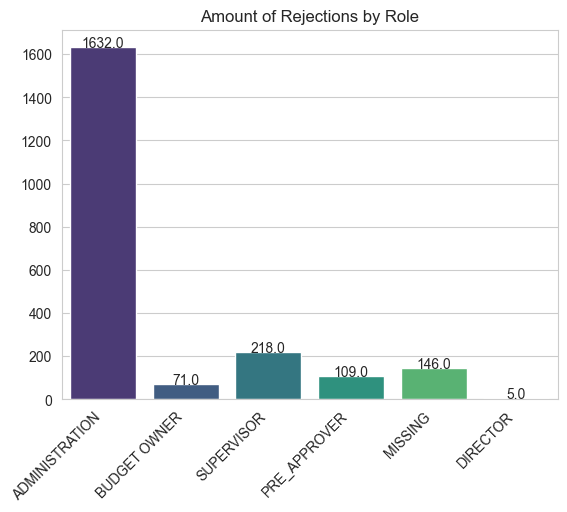

In [59]:
visualize_amount_of_rejections_by_role(log_i_r)

First we take a look at the amount of rejections by role for the dataset for international travel.
As seen in the barchart above, the role ``'ADMINISTRATION'`` is by far responsible for most rejections amounting to 1632. The ``'SUPERVISOR'`` role records the second highest amount of rejections with only 218. This could be another indication of the more stringent regulation of international travel.

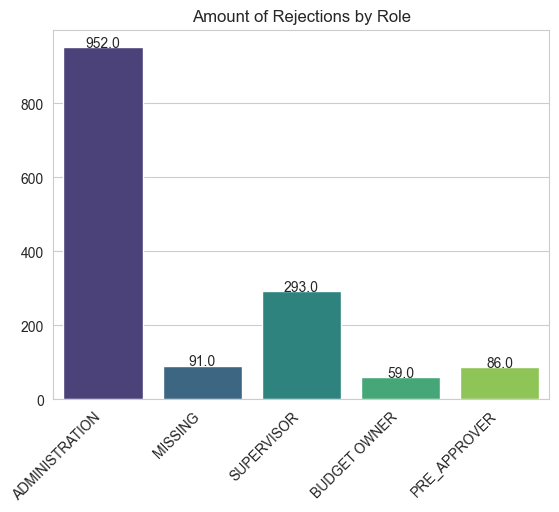

In [60]:
visualize_amount_of_rejections_by_role(log_d_r)

Similar to the international travel dataset, ``'ADMINISTRATION'`` is responsible for most of the rejections for domestic travel.

Now it would be interesting to investigate whether there are indications of the reasons for a rejection in the data set. First we look at the amount requested as an indicator for rejections by role to to reveal possible responsibilities depending on the requested amount. To do this, we first compare all applications that were accepted with those that were rejected.

In [61]:
log_i_a = log_i[log_i['concept:name'].str.contains('APPROVED|FINAL_APPROVED', regex=True)] 
log_d_a = log_d[log_d['concept:name'].str.contains('APPROVED|FINAL_APPROVED', regex=True)] 

In [62]:

def show_boxplot_of_requested_amount_by_role(log_r, log_a):

    plt.figure(figsize=(24, 12))

    plt.subplot(2, 1, 1)
    sns.boxplot(x='case:Amount', y='org:role', data=log_r, palette='viridis').set(title='Boxplot of Requested Amounts of REJECTED Applications by Role', xlabel='', ylabel='')
    plt.xticks(rotation=45, ha='center',ticks=range(0, int(log_r['case:Amount'].max()) + 250, 250)) 
    plt.grid(True)

    plt.subplot(2, 1, 2)
    sns.boxplot(x='case:Amount', y='org:role', data=log_a, palette='viridis').set(title='Boxplot of Requested Amounts of APPROVED Applications by Role', xlabel='', ylabel='')
    plt.xticks(rotation=45, ha='center',ticks=range(0, int(log_a['case:Amount'].max()) + 250, 250)) 
    plt.grid(True)

    plt.show()

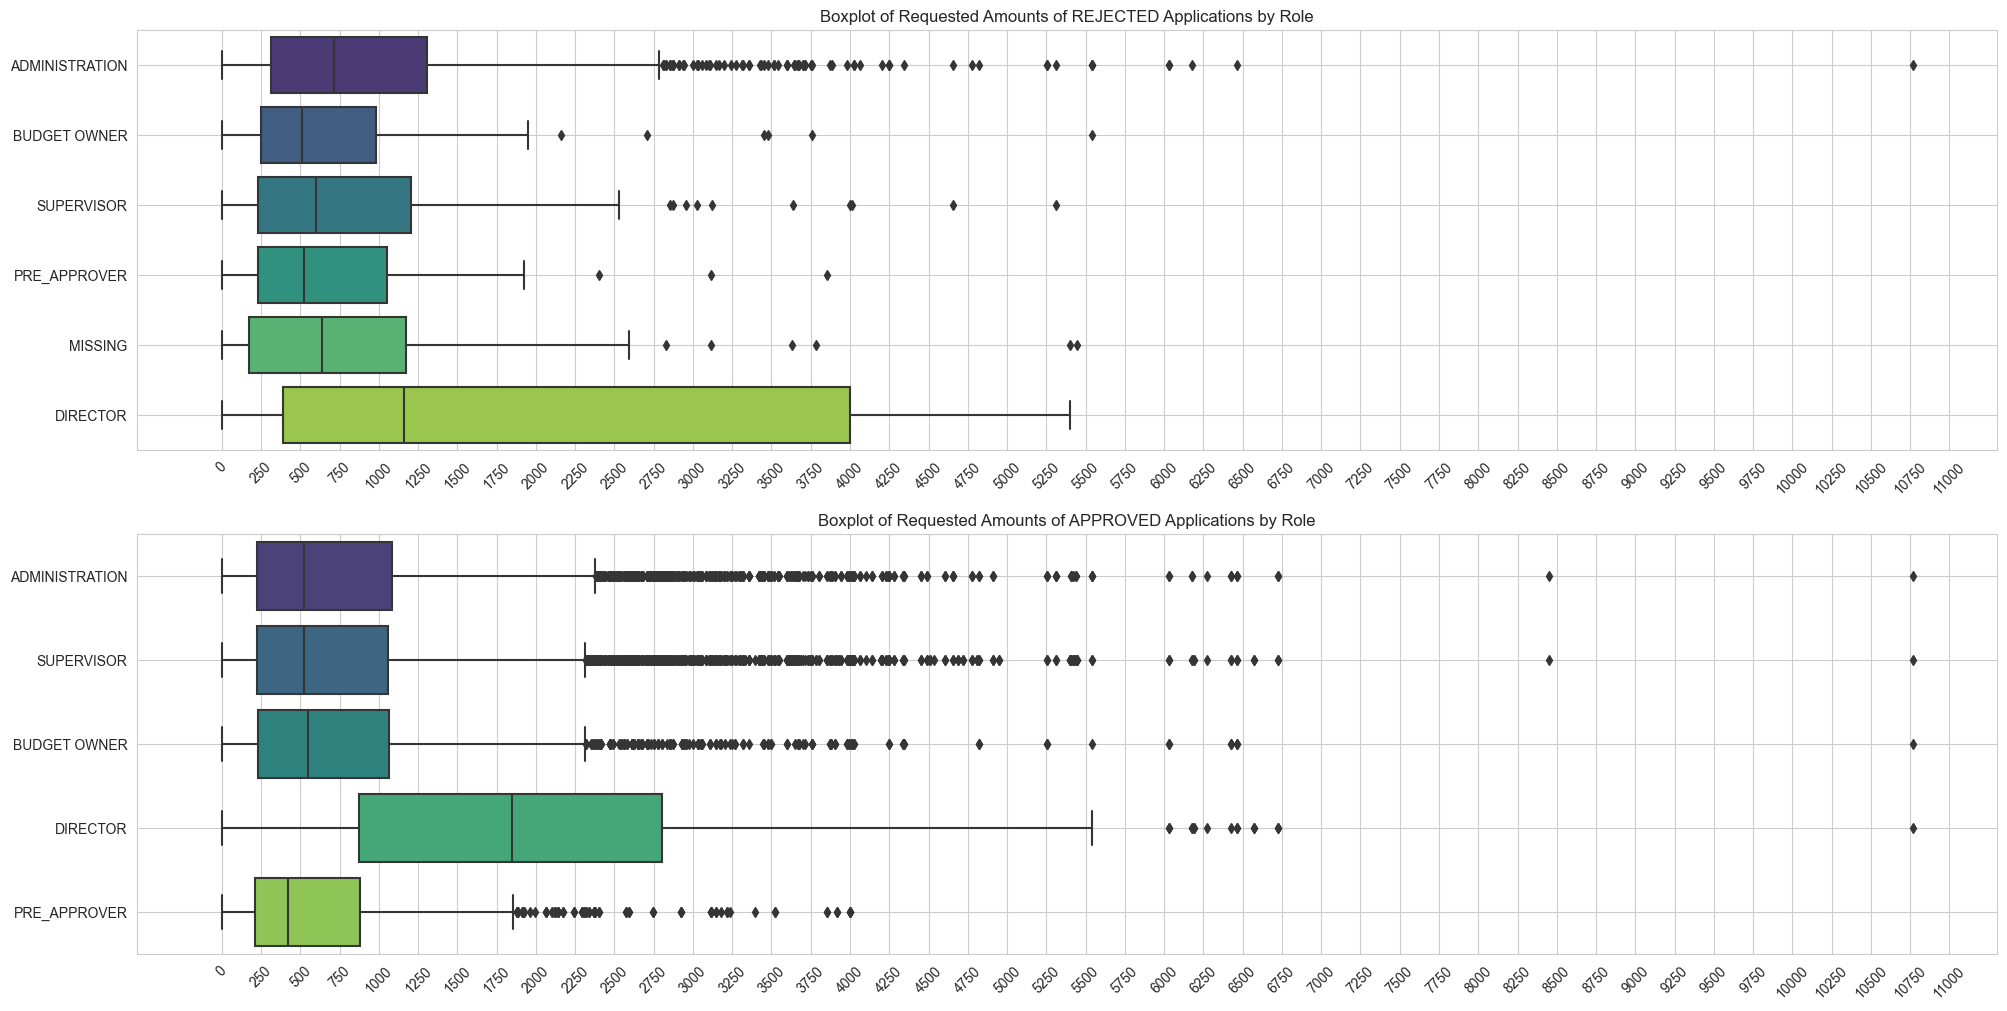

In [63]:
show_boxplot_of_requested_amount_by_role(log_i_r, log_i_a)

We illustrate a boxplot of the requested AMOUNTS of approved and rejected applications. In this case, we consider the dataset of international travel first.

``'ADMINISTRATION'`` role has the highest count of rejected applications at 1632 and has a median requested amount of approximately 700. The range of requested amount varies widely from a minimum of 0 to a significant maximum of approxemately 10750.
The ``'DIRECTOR'`` role has the highest median requested amount of approximately 1150, even though it has the least number of rejections (only 5). This suggests that while fewer requests by the ``'DIRECTOR'`` role get rejected, when they do, it's often for higher amounts.
The ``'MISSING'`` role sees an median rejection amount of about 625, with a notable maximum request of around 5400. Additionally, it is notable that the MISSING role is only involved in the rejection process.

Regarding the accepted applications, ``'ADMINISTRATION'``, ``'SUPERVISOR'`` and ``'BUDGET OWNER'`` have a similar distribution. This may be due to a succession of activities in the process. To this end, another clue could be the outliers at around 8450 and 10800. The ``'DIRECTOR'`` role has a high median accepted amount of around 1850, which is in line with the earlier observation that requests from the ``'DIRECTOR'`` role tend to be of higher monetary value.

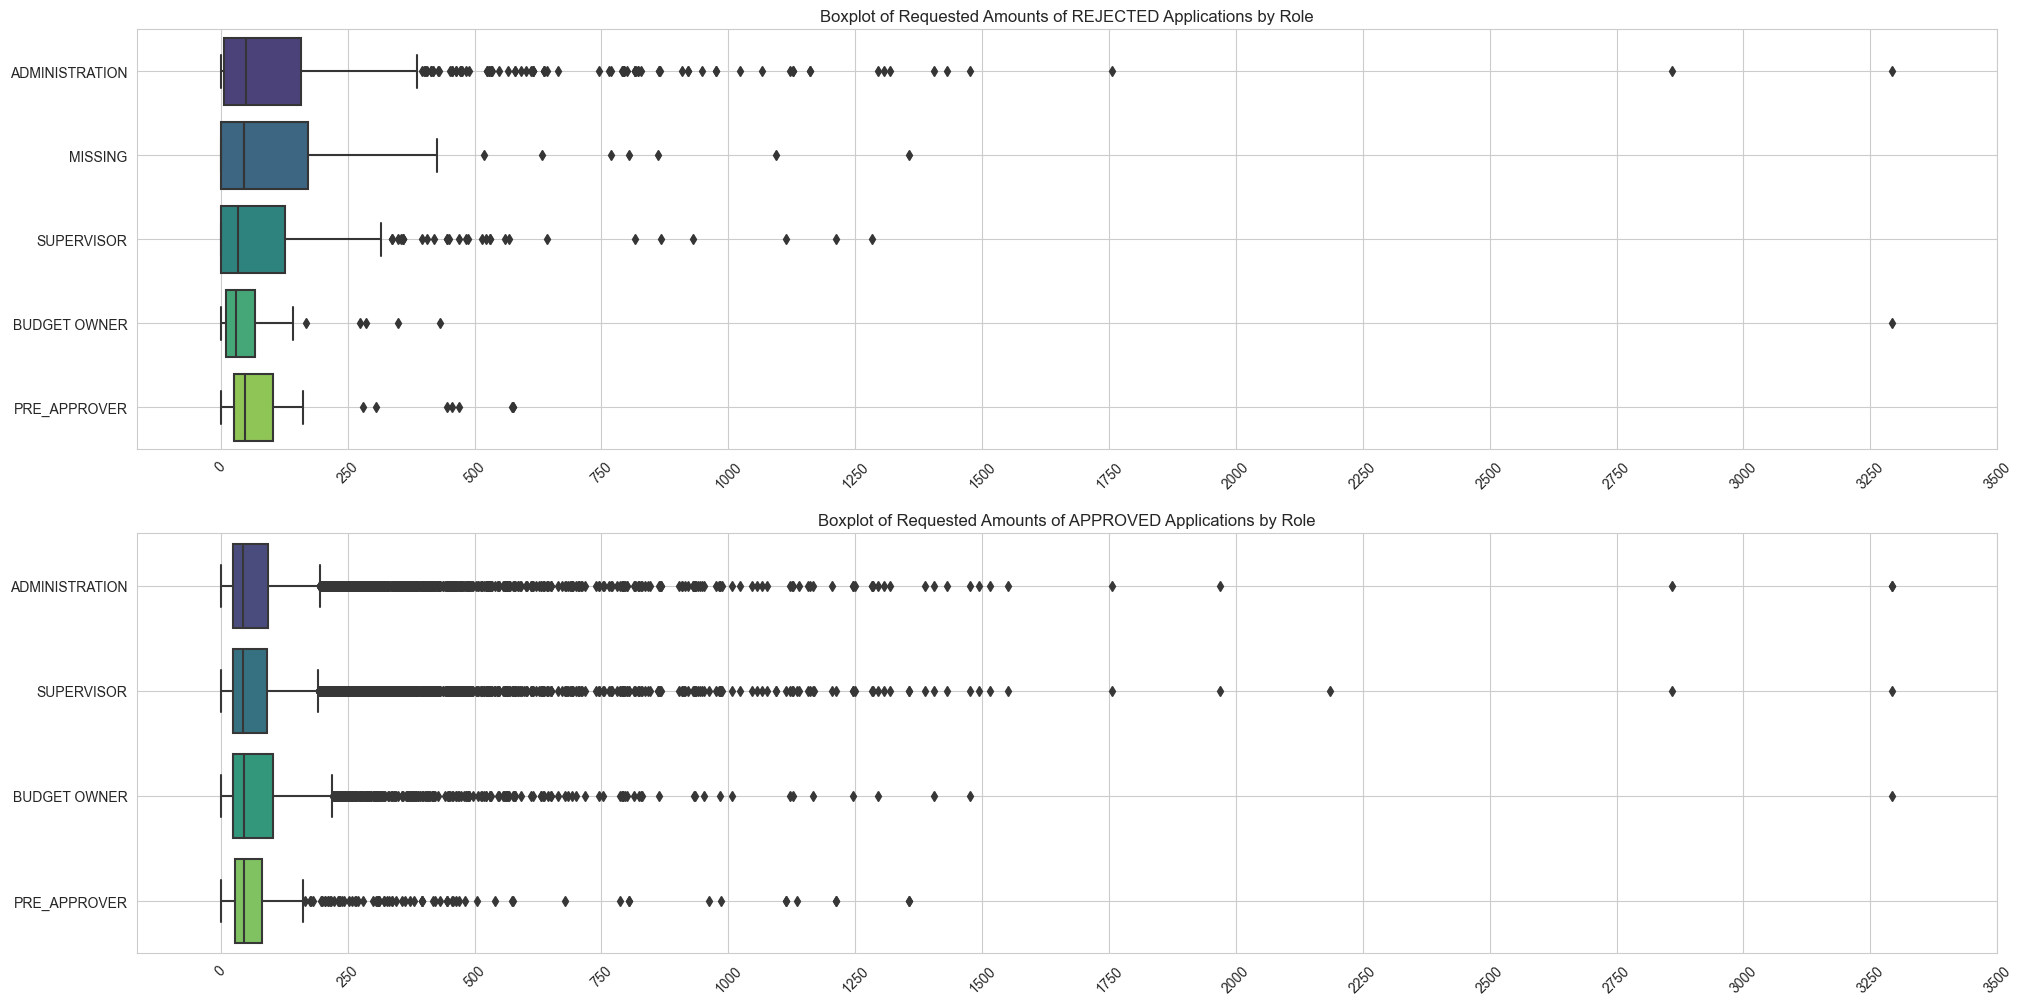

In [64]:
show_boxplot_of_requested_amount_by_role(log_d_r, log_d_a)

Now to the illustration of the domestic travel. 
The ``'ADMINISTRATION'`` role sees the highest number of rejections at 952 applications. The median requested amount is approximately 50, but the data ranges quite widely, with a maximum of around 3300, suggesting there are some large-value requests under this role that get rejected.

Simmilarly, the ``'ADMINISTRATION'`` role sees a median approved amount of around 50, and the samme maximum amountting to 3300. This datapoint might be another hint of the succession of activities in the process, because outliers of the same amount occur for the roles ``'SUPERVISOR'`` and ``'BUDGET OWNER'`` as well.

Generellay, regarding domestic travel, as seen from the quartiles that indicates a right-skewed pattern, a majority of the requests are of lower value.

In [65]:
log_i_paid = log_i[log_i['concept:name'].str.contains('Payment Handled')]  # Contains all approved declarations for international travel
log_d_paid = log_d[log_d['concept:name'].str.contains('Payment Handled')]  # Contains all approved declarations for domestic travel

In [66]:
def show_hist_of_requested_amounts(approved_amounts,rejected_amounts):

    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)

    sns.histplot(approved_amounts['case:Amount'],color='green', kde=False, bins=50).set(title='Distribution of Requested Amounts for Approved Cases', xlabel='Requested Amount', ylabel='Frequency');
    plt.grid(True)

    plt.subplot(1, 2, 2)
    sns.histplot(rejected_amounts['case:Amount'],color='red', kde=False, bins=50).set(title='Distribution of Requested Amounts for Rejected Cases', xlabel='Requested Amount', ylabel='Frequency');
    plt.grid(True)

    plt.tight_layout()
    plt.show()

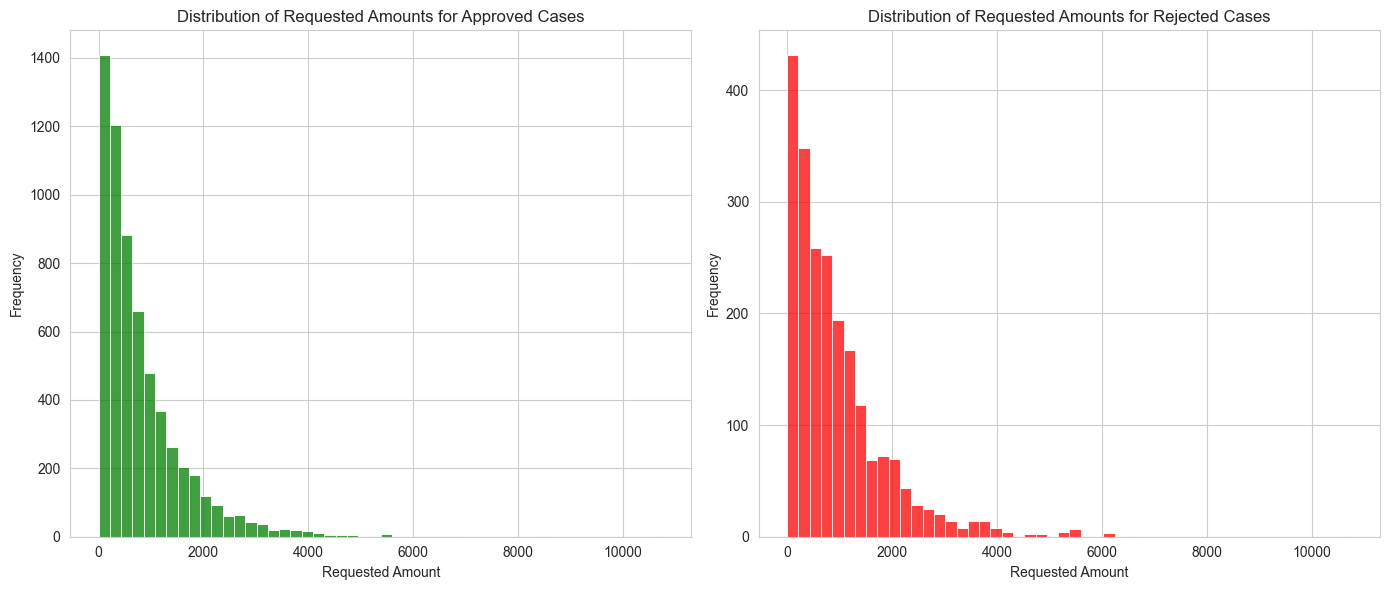

In [67]:
show_hist_of_requested_amounts(log_i_paid, log_i_r)

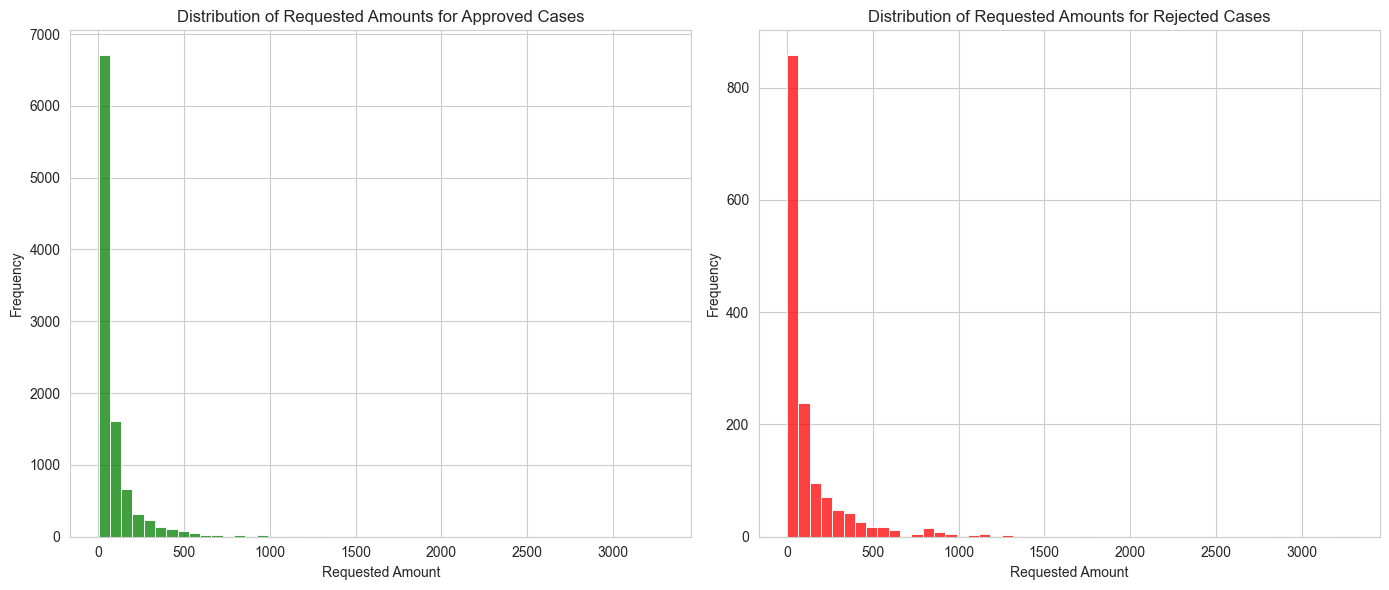

In [68]:
show_hist_of_requested_amounts(log_d_paid, log_d_r)

In both histrogrammes for domestic as well as international travel it can be seen, that the amount requested will not be a direct indication of an accepted or rejected application.
However, it can be seen that approved and likewise rejected cases of international travel are more likely to be associated with higher requested amounts than domestric travel.

# Conclusion

In conclusion, the analysis of the Travel Declaration process utilizing data manipulation and process mining tools has provided valuable insights into the process duration, potential bottlenecks, and areas for improvement. 

By examining the duration of each step, it was possible to identify steps that may be causing delays or inefficiencies. This information can be used to prioritize process optimization efforts and streamline the travel declaration process.

The process map created during the analysis has also been instrumental in understanding the relationships between different steps and identifying dependencies and decision points. This visual representation of the process flow has facilitated a better understanding of the overall process and has enabled the identification of potential areas for process enhancement.

Additionally, the analysis of rejected applications within the travel declaration process has allowed for the identification of potential reasons for rejection. By addressing these reasons, it is possible to reduce the number of rejected applications and improve the overall efficiency of the process.

Based on these findings, several recommendations can be made for improving the Travel Declaration process. These recommendations may include streamlining certain steps, automating manual processes, improving communication between stakeholders, and implementing measures to reduce rejection rates.

Overall, this analysis has provided valuable insights into the Travel Declaration process and has laid the foundation for process optimization efforts. By implementing the recommended improvements, it is possible to achieve a more efficient and streamlined travel declaration process, ultimately benefiting both the organization and its stakeholders.